In [2]:
import logging
import sys
import os
%cd ..
from bds.meel import approx_mc2, approx_mc2_core
from bds.rule import Rule
from bds.utils import bin_random , bin_array, randints, solutions_to_dict

#from bds.bb import BranchAndBoundNaive, BranchAndBoundV1, BranchAndBoundV0, BranchAndBoundV2
from logzero import logger
import gmpy2 as gmp
from gmpy2 import mpz , mpfr
from bds.sat.min_freq import construct_min_freq_program
from bds.sat.solver import construct_solver
from bds.gf2 import GF
from bds.rule import Rule
from bds.utils import mpz_set_bits
from tests.utils import assert_dict_allclose, assert_close_mpfr

#from bds.bounds_utils import find_equivalence_classes
import numpy as np 

from bds.cbb_v2 import * 

logger.setLevel(logging.DEBUG)

num_pts = 500

show_progres = True
rand_seed = 1234

/u/50/ciaperm1/unix/sampling-rashomon-decision-set-code


In [ ]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [5]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)

    
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    

In [ ]:
os.chdir("/u/50/ciaperm1/unix/Desktop/sampling-rashomon-decision-set-code")

In [ ]:
import matplotlib.pyplot as plt 

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# plot 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0], markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^",  linewidth=1.5 ,  color = colors[1],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB", marker = "s", linewidth=1.5 ,  color = colors[2],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.yscale("log") 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/log_first_comparison_bounds" + ".pdf")
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
plt.plot([10, 25, 40], all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot([10, 25, 40], all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB") 
plt.xlabel("# Rules")
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds" + ".pdf" )
plt.show()

#### Check same results 

In [ ]:
from time import time

#num_rules_list = reversed([25, 50, 75, 100, 200])
ub = 0.7
lmbd = 0.1
res_rows = []
all_times_naive = []
all_times_V1 = [] 
all_times_V0 = [] 

for num_rules in [10]:
    
    rules = [Rule.random(i+1, num_pts) for i in range(num_rules)]
    y = bin_random(num_pts)
    
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    
    
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V0)
    
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    
    assert_dict_allclose(actualNaive, actual_V1)

In [ ]:
actualNaive


### try real world data 

In [1]:
from sklearn import datasets 
import logging
import sys
import os
%cd ..
from bds.meel import approx_mc2, approx_mc2_core
from bds.rule import Rule
from bds.utils import bin_random , bin_array, randints, solutions_to_dict

#from bds.bb import BranchAndBoundNaive, BranchAndBoundV1, BranchAndBoundV0, BranchAndBoundV2
from logzero import logger
import gmpy2 as gmp
from gmpy2 import mpz , mpfr
from bds.sat.min_freq import construct_min_freq_program
from bds.sat.solver import construct_solver
from bds.gf2 import GF
from bds.rule import Rule
from bds.utils import mpz_set_bits
from tests.utils import assert_dict_allclose, assert_close_mpfr

#from bds.bounds_utils import find_equivalence_classes
import numpy as np 

#from bds.cbb_v2 import * 

logger.setLevel(logging.DEBUG)

num_pts = 500

show_progres = True
rand_seed = 1234

/u/50/ciaperm1/unix/sampling-rashomon-decision-set-code


In [2]:
import pandas as pd

In [3]:
# Load the CSV file using Pandas
data = pd.read_csv('data/compas_test-binary.csv')

# Print the data
data.head()

,sex:Male,age:18-20,age:21-22,age:23-25,age:26-45,age:>45,juvenile-felonies:>0,juvenile-misdemeanors:>0,juvenile-crimes:>0,priors:2-3,priors:=0,priors:=1,priors:>3,current-charge-degree:Misdemeanor,recidivate-within-two-years:1
0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [4]:
data.shape

(721, 15)

In [5]:
X = data.to_numpy()

In [6]:
X.shape

(721, 15)

In [7]:
# read labels 
f = open("data/compas_test.label", "r")
labels = []
for row in f.readlines(): 
    labels.append(list(map(int, row.split(" ")[1:])))

In [8]:
y = np.array(labels[1], dtype = bool) 

In [9]:
assert len(y) == X.shape[0]

In [10]:
# now we need to extract rules 
X_bag = [set([j for j, x in enumerate(row) if x]) for row in X]

In [11]:
from bds.fpgrowth import preprocess_transaction_list, build_fptree, fpgrowth_on_tree

In [12]:
lmbd = 0.1
min_support = lmbd * X.shape[0] / 2

In [13]:
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)
frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))

In [14]:
len(frequent_itemsets)

83

In [15]:
from bds.rule import Rule
from time import time

def compute_truthtable(X,itemset): 
    ''' poorly optimized function '''
    support_list = [] 
    for i in range(X.shape[0]): 
        if sum([X[i][j] for j in itemset]) == len(itemset): 
            support_list.append(i)
                
    truthtable = mpz_set_bits(mpz(), support_list)
    
    return truthtable
    

In [16]:
# Now create rules 
rules = [] 
for i,itemset in enumerate(frequent_itemsets):
    tt = compute_truthtable(X,itemset)
    this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
    # we need the truthtable for this itemset 
    rules.append(this_Rule) 
    

In [17]:
import pickle 
pickle.dump(rules, open("rules_compas_" + str(len(rules)), "wb" ))

In [18]:

from bds.cbb_v2 import (
    ConstrainedBranchAndBound,
    count_added_pivots,
    ensure_no_violation,
    ensure_satisfiability,
)

In [19]:
from bds.bb import BranchAndBoundNaive

In [20]:
lmbd = 0.1
ub = 0.4 
#cbb = ConstrainedBranchAndBoundNaive(rules, ub, y, lmbd)
bb = BranchAndBoundNaive(rules, ub, y, lmbd)

[D 230627 21:27:06 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1


In [21]:
bb.reset()

In [22]:
bb.tree.num_nodes

1

In [23]:
[int(x) for x in ['35', '60']]

[35, 60]

In [24]:
from bds.bbSampleTree import BranchAndBoundNaive
import time 
import random

In [25]:
lmbd = 0.1
ub = 0.4 
bb = BranchAndBoundNaive(rules, ub, y, lmbd, l=2, k=10) 
ll = list(bb.runST())
ll

[D 230627 21:27:07 bbSampleTree:60] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1


(Node(rule_id=0, lower_bound=0.0, objective=0.477115), mpz(11031304526203974597457456414861827591216226218170224705794538792432397774848431640257320003887617175667569787102671861633294128382337464639166223001902133228245297232354359845986844033174623155170927185464197384241151))
(Node(rule_id=0-40-83, lower_bound=0.1, objective=0.1), mpz(3211499690991148407733579620745026249954629381804979102378327372099410124557255869104271864434435523115803414656337931711820351550657519539023685631739814635957319785015599021536795719800400108849769393134089426377809))
(Node(rule_id=0-71-72, lower_bound=0.1, objective=0.2692094313453537), mpz(8772936187414604013754635288543984264294711005625398539727385378298773021083275118970731370782245486980802137882772189024179400623086248700522415876656316414627931409101465939605824921109717944067204352097679317105881))
(Node(rule_id=0-35-40, lower_bound=0.1, objective=0.1), mpz(3211499690991148407733579620745026249954629381804979102378327372099410124557255869104

[]

In [28]:
bb.reset_tree()

In [29]:
bb.tree.root

Node(rule_id=0, lower_bound=0.0, objective=0.477115)

In [30]:
pseudosolutions = [bb.tree.root] # empty -- 

In [31]:
sampled_items = random.sample(pseudosolutions, 1)

In [32]:
sampled_items

[Node(rule_id=0, lower_bound=0.0, objective=0.477115)]

In [33]:
not_captured_root = bb._not_captured_by_default_rule()



In [34]:
pseudosolutions = [(bb.tree._root, not_captured_root)] # empty -
pseudosolutions     

[(Node(rule_id=0, lower_bound=0.0, objective=0.477115),
  mpz(11031304526203974597457456414861827591216226218170224705794538792432397774848431640257320003887617175667569787102671861633294128382337464639166223001902133228245297232354359845986844033174623155170927185464197384241151))]

In [35]:
out = list(bb._loop( *pseudosolutions[0] , 1 , return_objective=False))

In [39]:
set(out)

TypeError: unhashable type: 'set'

In [31]:
input_set = {'0', '4-57'}

output_list = [int(part) for item in input_set for part in item.split('-')]
print(output_list)

[0, 4, 57]


In [33]:
import gmpy2 as gmp

In [38]:
a1 = np.array([0,0,1,1,0,1]) 
a2 = np.array([0,1,0,1,0,1]) 
def mpz_set_bits(n: mpz, bits: np.ndarray) -> mpz:
    """return a copy of n and set `bits` to 1 in `n`"""
    for i in bits:
        n = gmp.bit_set(n, int(i))
    return n


In [39]:
a1_mpz = mpz_set_bits( mpz(), a1.nonzero()[0])
a2_mpz = mpz_set_bits( mpz(), a2.nonzero()[0])

In [60]:
a3_mpz = mpz_set_bits( mpz(), a3.nonzero()[0]) 

In [61]:
a3_mpz

mpz(33)

In [51]:
logicalAnda = a1_mpz | a2_mpz

In [52]:
logicalAnda

mpz(46)

In [45]:
def mpz2bag(n: mpz):
    """given a mpz() this function returns the indices of non-zero entries"""
    i = 0
    bag = set()
    thisBit = gmp.bit_scan1(n, i)
    while thisBit is not None:
        bag.add(thisBit)
        i += 1
        thisBit = gmp.bit_scan1(n, i)

    return bag

mpz2bag(a1_mpz)

{2, 3, 5}

In [53]:
a1, a2

(array([0, 0, 1, 1, 0, 1]), array([0, 1, 0, 1, 0, 1]))

In [54]:
mpz2bag(logicalAnda)

{1, 2, 3, 5}

In [57]:
def compute_union(vectors):
    result = vectors[0]  # Initialize result with the first vector
    for vector in vectors[1:]:
        result = result | vector   # Perform bitwise OR operation
    return result

a3 = np.array([1,0,0,0,0,1])

In [58]:
out = compute_union([a1, a2, a3]) 
out

array([1, 1, 1, 1, 0, 1])

In [62]:
out = compute_union([a1_mpz, a2_mpz, a3_mpz]) 
out

mpz(47)

In [63]:
mpz2bag(out)

{0, 1, 2, 3, 5}

In [37]:
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)

all_times_naive = [] 
all_times = [] 
all_times_approx_mc2= []

eps = 0.75
delta = 0.75

for min_support in [30, 40 , 50, 60]:  
    
    
    #print("min support " + str(min_support)) 
    #print("tree " + str(tree))

    frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))
    # Now create rules 
    rules = [] 
    for i,itemset in enumerate(frequent_itemsets):
        tt = compute_truthtable(X,itemset)
        this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
        # we need the truthtable for this itemset 
        rules.append(this_Rule) 
    
    print(len(rules))

98
77
61
46


In [40]:
ordered_input_data = preprocess_transaction_list(
    X_bag, min_support
)
tree = build_fptree(ordered_input_data)

all_times_naive = [] 
all_times = [] 
all_times_approx_mc2= []

eps = 0.75
delta = 0.75

for min_support in [30, 40 , 50, 60]:  
    
    
    #print("min support " + str(min_support)) 
    #print("tree " + str(tree))

    frequent_itemsets = set(fpgrowth_on_tree(tree, set(), min_support))
    # Now create rules 
    rules = [] 
    for i,itemset in enumerate(frequent_itemsets):
        tt = compute_truthtable(X,itemset)
        this_Rule = Rule(id = i+1, name = "rule_" + str(i), cardinality=len(itemset), truthtable=tt)
        # we need the truthtable for this itemset 
        rules.append(this_Rule) 
    
    #    
    #
    
    print(len(rules))
    
    pickle.dump(rules, open("rules_compas_" + str(len(rules)), "wb" ))

    lmbd = 0.1
    ub = 0.4 
    cbb = ConstrainedBranchAndBoundNaive(rules, ub, y, lmbd)
    cbb_v2 = ConstrainedBranchAndBound(rules, ub, y, lmbd)
    
    #
    #
    
    rand_seed = 12
    num_constraints = 5
    num_rules = len(rules)
    
    from bds.random_hash import generate_h_and_alpha
    A, t = generate_h_and_alpha(
    num_rules, num_constraints, rand_seed, as_numpy=True
    )
    
    start_time = time.time() 
    actual_sols = solutions_to_dict(
    list(cbb_v2.run(return_objective=True, A=A, t=t)))
    all_times.append(time.time() - start_time)
    
    
    start_time = time.time() 
    actual_sols = solutions_to_dict(
    list(cbb.run(return_objective=True, A=A, t=t)))
    all_times_naive.append(time.time() - start_time)
    
    
    thresh = 72
    prev_m = 1
    start_time = time.time() 
    est = approx_mc2( rules =  rules,
    y=y,
    lmbd = lmbd,
    ub = ub,
    delta =delta,
    eps =  eps)
    all_times_approx_mc2.append(time.time() - start_time)
    


[D 230620 20:38:59 bb:53] calling ConstrainedBranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 20:38:59 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:38:59 cbb:160] setting up the parity constraint system
[D 230620 20:38:59 cbb:129] simplifying A x = t using rref
[D 230620 20:38:59 cbb:136] density(A_rref) = 49.388% (from 52.2%)


98


[D 230620 20:39:00 cbb:160] setting up the parity constraint system
[D 230620 20:39:00 cbb:129] simplifying A x = t using rref
[D 230620 20:39:00 cbb:136] density(A_rref) = 49.388% (from 52.2%)
[D 230620 20:39:01 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 20:39:01 meel:361] thresh = 77.53
[D 230620 20:39:01 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 20:39:01 meel:372] BB solving (thresh=77) takes 0.00 secs
    and gave 77 solutions
[D 230620 20:39:01 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 20:39:01 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:39:01 meel:277] initial solving under 97 constraints
[D 230620 20:39:01 cbb:160] setting up the parity constraint system
[D 230620 20:39:01 cbb:129] simplifying A x = t using rref
[D 230620 20:39:01 cbb:136] density(A_rref) = 1.851% (from 49.7%)
[D 230

time_cost_info: [(1, 0.04957977501908317), (2, 0.051394104957580566), (3, 0.03492352197645232), (4, 0.04315206303726882), (8, 0.6537065260345116), (6, 0.3204387199948542), (7, 0.7488205439876765)]


[D 230620 20:39:03 meel:150] search tree size: 1227
[D 230620 20:39:03 meel:151] number of prefix evaluations: 1402
[D 230620 20:39:03 meel:153] solving takes 0.33 secs
[D 230620 20:39:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:03 meel:138] ---- solve m = 2----
[D 230620 20:39:03 cbb:160] setting up the parity constraint system
[D 230620 20:39:03 cbb:129] simplifying A x = t using rref
[D 230620 20:39:03 cbb:136] density(A_rref) = 56.122% (from 50.5%)
[D 230620 20:39:03 meel:150] search tree size: 3170
[D 230620 20:39:03 meel:151] number of prefix evaluations: 5509
[D 230620 20:39:03 meel:153] solving takes 0.11 secs
[D 230620 20:39:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:03 meel:138] ---- solve m = 3----
[D 230620 20:39:03 cbb:160] setting up the parity constraint system
[D 230620 20:39:03 cbb:129] simplifying A x = t using rref
[D 230620 20:39:03 cbb:136] density(A_rref) = 55.442% (from 50.0%)
[D 230620 20:39:03 meel:150] search tree size: 3610
[D 230620 20:3

time_cost_info: [(1, 0.32564659300260246), (2, 0.10775034799007699), (3, 0.12129109096713364), (4, 0.18978336703730747), (8, 0.7870786919957027), (6, 0.4139073800179176), (7, 0.8302674819715321)]


[D 230620 20:39:06 meel:150] search tree size: 3373
[D 230620 20:39:06 meel:151] number of prefix evaluations: 7586
[D 230620 20:39:06 meel:153] solving takes 0.44 secs
[D 230620 20:39:06 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:06 meel:138] ---- solve m = 4----
[D 230620 20:39:06 cbb:160] setting up the parity constraint system
[D 230620 20:39:06 cbb:129] simplifying A x = t using rref
[D 230620 20:39:06 cbb:136] density(A_rref) = 50.510% (from 51.0%)
[D 230620 20:39:06 meel:150] search tree size: 1407
[D 230620 20:39:06 meel:151] number of prefix evaluations: 9280
[D 230620 20:39:06 meel:153] solving takes 0.06 secs
[D 230620 20:39:06 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:06 meel:138] ---- solve m = 8----
[D 230620 20:39:06 cbb:160] setting up the parity constraint system
[D 230620 20:39:06 cbb:129] simplifying A x = t using rref
[D 230620 20:39:06 cbb:136] density(A_rref) = 47.577% (from 51.3%)
[D 230620 20:39:07 meel:150] search tree size: 8746
[D 230620 20:3

time_cost_info: [(1, 0.05656071600969881), (2, 0.07567885896423832), (3, 0.4396778629743494), (4, 0.0619779690168798), (8, 0.7490549110225402), (6, 0.38293605600483716), (7, 0.7571595530025661)]


[D 230620 20:39:08 meel:150] search tree size: 3691
[D 230620 20:39:08 meel:151] number of prefix evaluations: 8495
[D 230620 20:39:08 meel:153] solving takes 0.15 secs
[D 230620 20:39:08 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:08 meel:138] ---- solve m = 4----
[D 230620 20:39:08 cbb:160] setting up the parity constraint system
[D 230620 20:39:08 cbb:129] simplifying A x = t using rref
[D 230620 20:39:08 cbb:136] density(A_rref) = 49.745% (from 50.0%)
[D 230620 20:39:08 meel:150] search tree size: 4315
[D 230620 20:39:08 meel:151] number of prefix evaluations: 15819
[D 230620 20:39:08 meel:153] solving takes 0.14 secs
[D 230620 20:39:08 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:08 meel:138] ---- solve m = 8----
[D 230620 20:39:08 cbb:160] setting up the parity constraint system
[D 230620 20:39:08 cbb:129] simplifying A x = t using rref
[D 230620 20:39:08 cbb:136] density(A_rref) = 46.939% (from 49.4%)
[D 230620 20:39:09 meel:150] search tree size: 9272
[D 230620 20:

time_cost_info: [(1, 0.04311866097850725), (2, 0.0687599289813079), (3, 0.15368386899353936), (4, 0.14310189796378836), (8, 0.9609014330198988), (6, 0.49473758100066334), (7, 0.7628461010172032)]


[D 230620 20:39:11 meel:150] search tree size: 3160
[D 230620 20:39:11 meel:151] number of prefix evaluations: 6195
[D 230620 20:39:11 meel:153] solving takes 0.12 secs
[D 230620 20:39:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:11 meel:138] ---- solve m = 4----
[D 230620 20:39:11 cbb:160] setting up the parity constraint system
[D 230620 20:39:11 cbb:129] simplifying A x = t using rref
[D 230620 20:39:11 cbb:136] density(A_rref) = 46.173% (from 45.4%)
[D 230620 20:39:11 meel:150] search tree size: 4460
[D 230620 20:39:11 meel:151] number of prefix evaluations: 14131
[D 230620 20:39:11 meel:153] solving takes 0.15 secs
[D 230620 20:39:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:11 meel:138] ---- solve m = 8----
[D 230620 20:39:11 cbb:160] setting up the parity constraint system
[D 230620 20:39:11 cbb:129] simplifying A x = t using rref
[D 230620 20:39:11 cbb:136] density(A_rref) = 47.832% (from 45.8%)
[D 230620 20:39:12 meel:150] search tree size: 7372
[D 230620 20:

time_cost_info: [(1, 0.033114717982243747), (2, 0.05476562702096999), (3, 0.12125203100731596), (4, 0.14900100004160777), (8, 0.6333772559883073), (6, 0.7335619289660826), (7, 0.6691570749972016)]


[D 230620 20:39:13 meel:150] search tree size: 3229
[D 230620 20:39:13 meel:151] number of prefix evaluations: 6660
[D 230620 20:39:13 meel:153] solving takes 0.12 secs
[D 230620 20:39:13 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:13 meel:138] ---- solve m = 4----
[D 230620 20:39:13 cbb:160] setting up the parity constraint system
[D 230620 20:39:13 cbb:129] simplifying A x = t using rref
[D 230620 20:39:13 cbb:136] density(A_rref) = 47.449% (from 48.2%)
[D 230620 20:39:14 meel:150] search tree size: 6014
[D 230620 20:39:14 meel:151] number of prefix evaluations: 18803
[D 230620 20:39:14 meel:153] solving takes 0.20 secs
[D 230620 20:39:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:14 meel:138] ---- solve m = 8----
[D 230620 20:39:14 cbb:160] setting up the parity constraint system
[D 230620 20:39:14 cbb:129] simplifying A x = t using rref
[D 230620 20:39:14 cbb:136] density(A_rref) = 48.597% (from 49.1%)
[D 230620 20:39:14 meel:150] search tree size: 8684
[D 230620 20:

time_cost_info: [(1, 0.04194730700692162), (2, 0.07738687400706112), (3, 0.1155138029716909), (4, 0.20046108402311802), (8, 0.8004528069868684), (6, 0.5876617649919353), (7, 1.076338505023159)]


[D 230620 20:39:16 meel:150] search tree size: 3075
[D 230620 20:39:16 meel:151] number of prefix evaluations: 6793
[D 230620 20:39:16 meel:153] solving takes 0.11 secs
[D 230620 20:39:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:16 meel:138] ---- solve m = 4----
[D 230620 20:39:16 cbb:160] setting up the parity constraint system
[D 230620 20:39:16 cbb:129] simplifying A x = t using rref
[D 230620 20:39:16 cbb:136] density(A_rref) = 46.173% (from 48.7%)
[D 230620 20:39:16 meel:150] search tree size: 3483
[D 230620 20:39:16 meel:151] number of prefix evaluations: 12103
[D 230620 20:39:16 meel:153] solving takes 0.13 secs
[D 230620 20:39:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:16 meel:138] ---- solve m = 8----
[D 230620 20:39:16 cbb:160] setting up the parity constraint system
[D 230620 20:39:16 cbb:129] simplifying A x = t using rref
[D 230620 20:39:16 cbb:136] density(A_rref) = 47.449% (from 48.0%)
[D 230620 20:39:17 meel:150] search tree size: 9002
[D 230620 20:

time_cost_info: [(1, 0.039259131997823715), (2, 0.06440917000873014), (3, 0.1104793050326407), (4, 0.1259684730321169), (8, 0.7646162930177525), (6, 0.39711881504626945), (7, 0.761074629961513)]


[D 230620 20:39:19 meel:150] search tree size: 1350
[D 230620 20:39:19 meel:151] number of prefix evaluations: 2988
[D 230620 20:39:19 meel:153] solving takes 0.29 secs
[D 230620 20:39:19 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:19 meel:138] ---- solve m = 3----
[D 230620 20:39:19 cbb:160] setting up the parity constraint system
[D 230620 20:39:19 cbb:129] simplifying A x = t using rref
[D 230620 20:39:19 cbb:136] density(A_rref) = 45.578% (from 52.7%)
[D 230620 20:39:19 meel:150] search tree size: 3482
[D 230620 20:39:19 meel:151] number of prefix evaluations: 8133
[D 230620 20:39:19 meel:153] solving takes 0.10 secs
[D 230620 20:39:19 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:19 meel:138] ---- solve m = 4----
[D 230620 20:39:19 cbb:160] setting up the parity constraint system
[D 230620 20:39:19 cbb:129] simplifying A x = t using rref
[D 230620 20:39:19 cbb:136] density(A_rref) = 47.449% (from 50.5%)
[D 230620 20:39:19 meel:150] search tree size: 6403
[D 230620 20:3

time_cost_info: [(1, 0.041023520985618234), (2, 0.28603888099314645), (3, 0.10421663400484249), (4, 0.21974140999373049), (8, 0.6852297540172003), (6, 0.702367204008624), (5, 0.15090351400431246)]


[D 230620 20:39:21 meel:150] search tree size: 5553
[D 230620 20:39:21 meel:151] number of prefix evaluations: 17897
[D 230620 20:39:21 meel:153] solving takes 0.44 secs
[D 230620 20:39:21 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:21 meel:138] ---- solve m = 8----
[D 230620 20:39:21 cbb:160] setting up the parity constraint system
[D 230620 20:39:21 cbb:129] simplifying A x = t using rref
[D 230620 20:39:21 cbb:136] density(A_rref) = 46.811% (from 52.2%)
[D 230620 20:39:22 meel:150] search tree size: 9214
[D 230620 20:39:22 meel:151] number of prefix evaluations: 270539
[D 230620 20:39:22 meel:153] solving takes 0.65 secs
[D 230620 20:39:22 meel:197] |Y| < thresh (13 < 77)
[D 230620 20:39:22 meel:138] ---- solve m = 6----
[D 230620 20:39:22 cbb:160] setting up the parity constraint system
[D 230620 20:39:22 cbb:129] simplifying A x = t using rref
[D 230620 20:39:22 cbb:136] density(A_rref) = 48.129% (from 49.5%)
[D 230620 20:39:23 meel:150] search tree size: 9084
[D 230620 20:

time_cost_info: [(1, 0.04228265001438558), (2, 0.03946683602407575), (3, 0.07932125905063003), (4, 0.441582442028448), (8, 0.6541886940249242), (6, 0.6672414530185051), (5, 0.16237058298429474)]


[D 230620 20:39:23 meel:150] search tree size: 3389
[D 230620 20:39:23 meel:151] number of prefix evaluations: 9090
[D 230620 20:39:23 meel:153] solving takes 0.11 secs
[D 230620 20:39:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:23 meel:138] ---- solve m = 4----
[D 230620 20:39:23 cbb:160] setting up the parity constraint system
[D 230620 20:39:23 cbb:129] simplifying A x = t using rref
[D 230620 20:39:23 cbb:136] density(A_rref) = 45.408% (from 49.5%)
[D 230620 20:39:23 meel:150] search tree size: 6694
[D 230620 20:39:23 meel:151] number of prefix evaluations: 23119
[D 230620 20:39:23 meel:153] solving takes 0.19 secs
[D 230620 20:39:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:23 meel:138] ---- solve m = 8----
[D 230620 20:39:23 cbb:160] setting up the parity constraint system
[D 230620 20:39:23 cbb:129] simplifying A x = t using rref
[D 230620 20:39:23 cbb:136] density(A_rref) = 47.194% (from 51.9%)
[D 230620 20:39:24 meel:150] search tree size: 8392
[D 230620 20:

time_cost_info: [(1, 0.03989329299656674), (2, 0.07244695897679776), (3, 0.11304593400564045), (4, 0.1897905669757165), (8, 0.9620874199899845), (6, 0.6836081499932334), (5, 0.25111818697769195)]


[D 230620 20:39:25 meel:150] search tree size: 3104
[D 230620 20:39:25 meel:151] number of prefix evaluations: 6637
[D 230620 20:39:25 meel:153] solving takes 0.12 secs
[D 230620 20:39:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:25 meel:138] ---- solve m = 4----
[D 230620 20:39:25 cbb:160] setting up the parity constraint system
[D 230620 20:39:25 cbb:129] simplifying A x = t using rref
[D 230620 20:39:25 cbb:136] density(A_rref) = 47.449% (from 46.7%)
[D 230620 20:39:26 meel:150] search tree size: 4803
[D 230620 20:39:26 meel:151] number of prefix evaluations: 15339
[D 230620 20:39:26 meel:153] solving takes 0.15 secs
[D 230620 20:39:26 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:26 meel:138] ---- solve m = 8----
[D 230620 20:39:26 cbb:160] setting up the parity constraint system
[D 230620 20:39:26 cbb:129] simplifying A x = t using rref
[D 230620 20:39:26 cbb:136] density(A_rref) = 47.066% (from 49.6%)
[D 230620 20:39:26 meel:150] search tree size: 8393
[D 230620 20:

time_cost_info: [(1, 0.06666472199140117), (2, 0.0705612919991836), (3, 0.11941483098780736), (4, 0.1469585819868371), (8, 0.652209201012738), (6, 0.7585313159506768), (7, 0.6835231179720722)]


[D 230620 20:39:28 meel:150] search tree size: 3078
[D 230620 20:39:28 meel:151] number of prefix evaluations: 6808
[D 230620 20:39:28 meel:153] solving takes 0.12 secs
[D 230620 20:39:28 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:28 meel:138] ---- solve m = 4----
[D 230620 20:39:28 cbb:160] setting up the parity constraint system
[D 230620 20:39:28 cbb:129] simplifying A x = t using rref
[D 230620 20:39:28 cbb:136] density(A_rref) = 46.939% (from 51.5%)
[D 230620 20:39:28 meel:150] search tree size: 4555
[D 230620 20:39:28 meel:151] number of prefix evaluations: 14801
[D 230620 20:39:28 meel:153] solving takes 0.16 secs
[D 230620 20:39:28 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:28 meel:138] ---- solve m = 8----
[D 230620 20:39:28 cbb:160] setting up the parity constraint system
[D 230620 20:39:28 cbb:129] simplifying A x = t using rref
[D 230620 20:39:28 cbb:136] density(A_rref) = 46.046% (from 49.1%)
[D 230620 20:39:29 meel:150] search tree size: 8186
[D 230620 20:

time_cost_info: [(1, 0.0500061220373027), (2, 0.05365253100171685), (3, 0.12494233105098829), (4, 0.1606798160355538), (8, 0.6945329419686459), (6, 0.24942695902427658), (7, 1.1069036690169014)]


[D 230620 20:39:30 meel:150] search tree size: 3141
[D 230620 20:39:30 meel:151] number of prefix evaluations: 6663
[D 230620 20:39:30 meel:153] solving takes 0.14 secs
[D 230620 20:39:30 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:30 meel:138] ---- solve m = 4----
[D 230620 20:39:30 cbb:160] setting up the parity constraint system
[D 230620 20:39:30 cbb:129] simplifying A x = t using rref
[D 230620 20:39:30 cbb:136] density(A_rref) = 46.173% (from 49.5%)
[D 230620 20:39:31 meel:150] search tree size: 5695
[D 230620 20:39:31 meel:151] number of prefix evaluations: 18554
[D 230620 20:39:31 meel:153] solving takes 0.16 secs
[D 230620 20:39:31 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:31 meel:138] ---- solve m = 8----
[D 230620 20:39:31 cbb:160] setting up the parity constraint system
[D 230620 20:39:31 cbb:129] simplifying A x = t using rref
[D 230620 20:39:31 cbb:136] density(A_rref) = 46.684% (from 50.0%)
[D 230620 20:39:31 meel:150] search tree size: 7048
[D 230620 20:

time_cost_info: [(1, 0.05539052904350683), (2, 0.06734127999516204), (3, 0.13632890896406025), (4, 0.15879218600457534), (8, 0.5969707840122283), (6, 0.372116140963044), (7, 0.6192744239815511)]


[D 230620 20:39:33 meel:150] search tree size: 3235
[D 230620 20:39:33 meel:151] number of prefix evaluations: 7699
[D 230620 20:39:33 meel:153] solving takes 0.12 secs
[D 230620 20:39:33 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:33 meel:138] ---- solve m = 4----
[D 230620 20:39:33 cbb:160] setting up the parity constraint system
[D 230620 20:39:33 cbb:129] simplifying A x = t using rref
[D 230620 20:39:33 cbb:136] density(A_rref) = 47.449% (from 49.2%)
[D 230620 20:39:33 meel:150] search tree size: 5009
[D 230620 20:39:33 meel:151] number of prefix evaluations: 17126
[D 230620 20:39:33 meel:153] solving takes 0.45 secs
[D 230620 20:39:33 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:33 meel:138] ---- solve m = 8----
[D 230620 20:39:33 cbb:160] setting up the parity constraint system
[D 230620 20:39:33 cbb:129] simplifying A x = t using rref
[D 230620 20:39:33 cbb:136] density(A_rref) = 48.342% (from 49.4%)
[D 230620 20:39:34 meel:150] search tree size: 8250
[D 230620 20:

time_cost_info: [(1, 0.07002641103463247), (2, 0.08269788400502875), (3, 0.12362460495205596), (4, 0.44944775296607986), (8, 0.6802067540120333), (6, 0.28362551203463227), (7, 0.7074291959870607)]


[D 230620 20:39:35 meel:150] search tree size: 3259
[D 230620 20:39:35 meel:151] number of prefix evaluations: 7330
[D 230620 20:39:35 meel:153] solving takes 0.10 secs
[D 230620 20:39:35 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:35 meel:138] ---- solve m = 4----
[D 230620 20:39:35 cbb:160] setting up the parity constraint system
[D 230620 20:39:35 cbb:129] simplifying A x = t using rref
[D 230620 20:39:35 cbb:136] density(A_rref) = 50.000% (from 52.6%)
[D 230620 20:39:35 meel:150] search tree size: 5711
[D 230620 20:39:35 meel:151] number of prefix evaluations: 19056
[D 230620 20:39:35 meel:153] solving takes 0.17 secs
[D 230620 20:39:35 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:35 meel:138] ---- solve m = 8----
[D 230620 20:39:35 cbb:160] setting up the parity constraint system
[D 230620 20:39:35 cbb:129] simplifying A x = t using rref
[D 230620 20:39:35 cbb:136] density(A_rref) = 43.495% (from 50.1%)
[D 230620 20:39:36 meel:150] search tree size: 8799
[D 230620 20:

time_cost_info: [(1, 0.05095414095558226), (2, 0.059735085000284016), (3, 0.10485845501534641), (4, 0.1724198290030472), (8, 1.0302322109928355), (6, 0.38745640096021816), (7, 0.7383806980215013)]


[D 230620 20:39:38 meel:150] search tree size: 3253
[D 230620 20:39:38 meel:151] number of prefix evaluations: 7945
[D 230620 20:39:38 meel:153] solving takes 0.11 secs
[D 230620 20:39:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:38 meel:138] ---- solve m = 4----
[D 230620 20:39:38 cbb:160] setting up the parity constraint system
[D 230620 20:39:38 cbb:129] simplifying A x = t using rref
[D 230620 20:39:38 cbb:136] density(A_rref) = 46.173% (from 45.4%)
[D 230620 20:39:38 meel:150] search tree size: 5302
[D 230620 20:39:38 meel:151] number of prefix evaluations: 18980
[D 230620 20:39:38 meel:153] solving takes 0.17 secs
[D 230620 20:39:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:38 meel:138] ---- solve m = 8----
[D 230620 20:39:38 cbb:160] setting up the parity constraint system
[D 230620 20:39:38 cbb:129] simplifying A x = t using rref
[D 230620 20:39:38 cbb:136] density(A_rref) = 44.515% (from 47.4%)
[D 230620 20:39:38 meel:150] search tree size: 8716
[D 230620 20:

time_cost_info: [(1, 0.048007448960561305), (2, 0.06998011301038787), (3, 0.11234324600081891), (4, 0.1747598789515905), (8, 0.6766774390125647), (6, 0.639690509007778), (7, 0.6952688220189884)]


[D 230620 20:39:40 meel:150] search tree size: 3451
[D 230620 20:39:40 meel:151] number of prefix evaluations: 8231
[D 230620 20:39:40 meel:153] solving takes 0.11 secs
[D 230620 20:39:40 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:40 meel:138] ---- solve m = 4----
[D 230620 20:39:40 cbb:160] setting up the parity constraint system
[D 230620 20:39:40 cbb:129] simplifying A x = t using rref
[D 230620 20:39:40 cbb:136] density(A_rref) = 47.449% (from 51.8%)
[D 230620 20:39:40 meel:150] search tree size: 4270
[D 230620 20:39:40 meel:151] number of prefix evaluations: 15569
[D 230620 20:39:40 meel:153] solving takes 0.13 secs
[D 230620 20:39:40 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:40 meel:138] ---- solve m = 8----
[D 230620 20:39:40 cbb:160] setting up the parity constraint system
[D 230620 20:39:40 cbb:129] simplifying A x = t using rref
[D 230620 20:39:40 cbb:136] density(A_rref) = 46.046% (from 49.7%)
[D 230620 20:39:41 meel:150] search tree size: 8371
[D 230620 20:

time_cost_info: [(1, 0.04646143695572391), (2, 0.06484895199537277), (3, 0.10958427097648382), (4, 0.1271591149852611), (8, 0.6588723969762214), (6, 0.6536831420380622), (7, 0.6673603869858198)]


[D 230620 20:39:42 meel:150] search tree size: 3353
[D 230620 20:39:42 meel:151] number of prefix evaluations: 7150
[D 230620 20:39:42 meel:153] solving takes 0.14 secs
[D 230620 20:39:42 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:42 meel:138] ---- solve m = 4----
[D 230620 20:39:42 cbb:160] setting up the parity constraint system
[D 230620 20:39:42 cbb:129] simplifying A x = t using rref
[D 230620 20:39:42 cbb:136] density(A_rref) = 54.592% (from 50.5%)
[D 230620 20:39:43 meel:150] search tree size: 5160
[D 230620 20:39:43 meel:151] number of prefix evaluations: 16965
[D 230620 20:39:43 meel:153] solving takes 0.19 secs
[D 230620 20:39:43 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:43 meel:138] ---- solve m = 8----
[D 230620 20:39:43 cbb:160] setting up the parity constraint system
[D 230620 20:39:43 cbb:129] simplifying A x = t using rref
[D 230620 20:39:43 cbb:136] density(A_rref) = 46.939% (from 48.7%)
[D 230620 20:39:43 meel:150] search tree size: 8681
[D 230620 20:

time_cost_info: [(1, 0.06211418501334265), (2, 0.07218059699516743), (3, 0.13525686197681352), (4, 0.18687948602018878), (8, 0.6543687540106475), (6, 0.5179487700224854), (7, 1.03931746003218)]


[D 230620 20:39:45 meel:150] search tree size: 3727
[D 230620 20:39:45 meel:151] number of prefix evaluations: 8926
[D 230620 20:39:45 meel:153] solving takes 0.13 secs
[D 230620 20:39:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:45 meel:138] ---- solve m = 4----
[D 230620 20:39:45 cbb:160] setting up the parity constraint system
[D 230620 20:39:45 cbb:129] simplifying A x = t using rref
[D 230620 20:39:45 cbb:136] density(A_rref) = 46.173% (from 49.5%)
[D 230620 20:39:45 meel:150] search tree size: 5799
[D 230620 20:39:45 meel:151] number of prefix evaluations: 20667
[D 230620 20:39:45 meel:153] solving takes 0.17 secs
[D 230620 20:39:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:45 meel:138] ---- solve m = 8----
[D 230620 20:39:45 cbb:160] setting up the parity constraint system
[D 230620 20:39:45 cbb:129] simplifying A x = t using rref
[D 230620 20:39:45 cbb:136] density(A_rref) = 45.408% (from 48.2%)
[D 230620 20:39:46 meel:150] search tree size: 8737
[D 230620 20:

time_cost_info: [(1, 0.06470367003930733), (2, 0.0747126669739373), (3, 0.12549005198525265), (4, 0.1660461780265905), (8, 0.6376829199725762), (6, 0.46873068797867745), (7, 1.00431165198097)]


[D 230620 20:39:48 meel:150] search tree size: 3164
[D 230620 20:39:48 meel:151] number of prefix evaluations: 7500
[D 230620 20:39:48 meel:153] solving takes 0.09 secs
[D 230620 20:39:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:48 meel:138] ---- solve m = 4----
[D 230620 20:39:48 cbb:160] setting up the parity constraint system
[D 230620 20:39:48 cbb:129] simplifying A x = t using rref
[D 230620 20:39:48 cbb:136] density(A_rref) = 51.020% (from 52.6%)
[D 230620 20:39:48 meel:150] search tree size: 5107
[D 230620 20:39:48 meel:151] number of prefix evaluations: 17020
[D 230620 20:39:48 meel:153] solving takes 0.14 secs
[D 230620 20:39:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:48 meel:138] ---- solve m = 8----
[D 230620 20:39:48 cbb:160] setting up the parity constraint system
[D 230620 20:39:48 cbb:129] simplifying A x = t using rref
[D 230620 20:39:48 cbb:136] density(A_rref) = 47.959% (from 53.3%)
[D 230620 20:39:48 meel:150] search tree size: 8734
[D 230620 20:

time_cost_info: [(1, 0.043227971997112036), (2, 0.05610796500695869), (3, 0.08783481101272628), (4, 0.1404899230110459), (8, 0.6375081019941717), (6, 0.7048157919780351), (5, 0.1587880119914189)]


[D 230620 20:39:50 meel:150] search tree size: 3354
[D 230620 20:39:50 meel:151] number of prefix evaluations: 6413
[D 230620 20:39:50 meel:153] solving takes 0.10 secs
[D 230620 20:39:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:50 meel:138] ---- solve m = 4----
[D 230620 20:39:50 cbb:160] setting up the parity constraint system
[D 230620 20:39:50 cbb:129] simplifying A x = t using rref
[D 230620 20:39:50 cbb:136] density(A_rref) = 51.020% (from 46.2%)
[D 230620 20:39:50 meel:150] search tree size: 5330
[D 230620 20:39:50 meel:151] number of prefix evaluations: 16591
[D 230620 20:39:50 meel:153] solving takes 0.44 secs
[D 230620 20:39:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:50 meel:138] ---- solve m = 8----
[D 230620 20:39:50 cbb:160] setting up the parity constraint system
[D 230620 20:39:50 cbb:129] simplifying A x = t using rref
[D 230620 20:39:50 cbb:136] density(A_rref) = 47.704% (from 49.9%)
[D 230620 20:39:51 meel:150] search tree size: 9204
[D 230620 20:

time_cost_info: [(1, 0.024827624030876905), (2, 0.05743909097509459), (3, 0.09843694098526612), (4, 0.44405155000276864), (8, 0.6449314039782621), (6, 0.4253431830438785), (7, 0.6650276579894125)]


[D 230620 20:39:52 meel:150] search tree size: 3302
[D 230620 20:39:52 meel:151] number of prefix evaluations: 8142
[D 230620 20:39:52 meel:153] solving takes 0.09 secs
[D 230620 20:39:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:52 meel:138] ---- solve m = 4----
[D 230620 20:39:52 cbb:160] setting up the parity constraint system
[D 230620 20:39:52 cbb:129] simplifying A x = t using rref
[D 230620 20:39:52 cbb:136] density(A_rref) = 51.531% (from 49.5%)
[D 230620 20:39:52 meel:150] search tree size: 5111
[D 230620 20:39:52 meel:151] number of prefix evaluations: 17657
[D 230620 20:39:52 meel:153] solving takes 0.14 secs
[D 230620 20:39:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:52 meel:138] ---- solve m = 8----
[D 230620 20:39:52 cbb:160] setting up the parity constraint system
[D 230620 20:39:52 cbb:129] simplifying A x = t using rref
[D 230620 20:39:52 cbb:136] density(A_rref) = 45.663% (from 51.1%)
[D 230620 20:39:53 meel:150] search tree size: 8703
[D 230620 20:

time_cost_info: [(1, 0.044997600954957306), (2, 0.06465764495078474), (3, 0.0927760109771043), (4, 0.14053746301215142), (8, 0.9015035520424135), (6, 0.21005110000260174), (7, 0.6287949620164)]


[D 230620 20:39:54 meel:150] search tree size: 3467
[D 230620 20:39:54 meel:151] number of prefix evaluations: 9824
[D 230620 20:39:54 meel:153] solving takes 0.10 secs
[D 230620 20:39:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:54 meel:138] ---- solve m = 4----
[D 230620 20:39:54 cbb:160] setting up the parity constraint system
[D 230620 20:39:54 cbb:129] simplifying A x = t using rref
[D 230620 20:39:54 cbb:136] density(A_rref) = 47.194% (from 46.9%)
[D 230620 20:39:54 meel:150] search tree size: 5629
[D 230620 20:39:54 meel:151] number of prefix evaluations: 20871
[D 230620 20:39:54 meel:153] solving takes 0.15 secs
[D 230620 20:39:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:54 meel:138] ---- solve m = 8----
[D 230620 20:39:54 cbb:160] setting up the parity constraint system
[D 230620 20:39:54 cbb:129] simplifying A x = t using rref
[D 230620 20:39:54 cbb:136] density(A_rref) = 47.959% (from 49.6%)
[D 230620 20:39:55 meel:150] search tree size: 8786
[D 230620 20:

time_cost_info: [(1, 0.047279962978791445), (2, 0.08651211595861241), (3, 0.1046509700245224), (4, 0.1493753750110045), (8, 0.6236100579844788), (6, 0.6869620869983919), (7, 0.6660615989821963)]


[D 230620 20:39:56 meel:150] search tree size: 3335
[D 230620 20:39:56 meel:151] number of prefix evaluations: 7388
[D 230620 20:39:56 meel:153] solving takes 0.10 secs
[D 230620 20:39:56 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:56 meel:138] ---- solve m = 4----
[D 230620 20:39:56 cbb:160] setting up the parity constraint system
[D 230620 20:39:56 cbb:129] simplifying A x = t using rref
[D 230620 20:39:57 cbb:136] density(A_rref) = 47.194% (from 51.5%)
[D 230620 20:39:57 meel:150] search tree size: 1505
[D 230620 20:39:57 meel:151] number of prefix evaluations: 9215
[D 230620 20:39:57 meel:153] solving takes 0.06 secs
[D 230620 20:39:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:57 meel:138] ---- solve m = 8----
[D 230620 20:39:57 cbb:160] setting up the parity constraint system
[D 230620 20:39:57 cbb:129] simplifying A x = t using rref
[D 230620 20:39:57 cbb:136] density(A_rref) = 48.724% (from 49.2%)
[D 230620 20:39:57 meel:150] search tree size: 8115
[D 230620 20:3

time_cost_info: [(1, 0.046776639006566256), (2, 0.05777640995802358), (3, 0.09534231194993481), (4, 0.055455245019402355), (8, 0.5501089829485863), (6, 0.31658937997417524), (7, 0.8771213869913481)]


[D 230620 20:39:59 meel:150] search tree size: 1066
[D 230620 20:39:59 meel:151] number of prefix evaluations: 4268
[D 230620 20:39:59 meel:153] solving takes 0.06 secs
[D 230620 20:39:59 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:39:59 meel:138] ---- solve m = 8----
[D 230620 20:39:59 cbb:160] setting up the parity constraint system
[D 230620 20:39:59 cbb:129] simplifying A x = t using rref
[D 230620 20:39:59 cbb:136] density(A_rref) = 45.281% (from 52.3%)
[D 230620 20:39:59 meel:150] search tree size: 8704
[D 230620 20:39:59 meel:151] number of prefix evaluations: 238560
[D 230620 20:39:59 meel:153] solving takes 0.61 secs
[D 230620 20:39:59 meel:197] |Y| < thresh (24 < 77)
[D 230620 20:39:59 meel:138] ---- solve m = 6----
[D 230620 20:39:59 cbb:160] setting up the parity constraint system
[D 230620 20:39:59 cbb:129] simplifying A x = t using rref
[D 230620 20:39:59 cbb:136] density(A_rref) = 50.680% (from 52.6%)
[D 230620 20:39:59 meel:150] search tree size: 8561
[D 230620 20:3

time_cost_info: [(1, 0.03249745396897197), (2, 0.060339079005643725), (3, 0.035521197016350925), (4, 0.05655664898222312), (8, 0.6145159029983915), (6, 0.28463548800209537), (7, 0.6151696940069087)]


[D 230620 20:40:00 meel:150] search tree size: 3149
[D 230620 20:40:00 meel:151] number of prefix evaluations: 7354
[D 230620 20:40:00 meel:153] solving takes 0.10 secs
[D 230620 20:40:00 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:00 meel:138] ---- solve m = 4----
[D 230620 20:40:00 cbb:160] setting up the parity constraint system
[D 230620 20:40:00 cbb:129] simplifying A x = t using rref
[D 230620 20:40:00 cbb:136] density(A_rref) = 47.194% (from 50.8%)
[D 230620 20:40:01 meel:150] search tree size: 5007
[D 230620 20:40:01 meel:151] number of prefix evaluations: 16744
[D 230620 20:40:01 meel:153] solving takes 0.43 secs
[D 230620 20:40:01 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:01 meel:138] ---- solve m = 8----
[D 230620 20:40:01 cbb:160] setting up the parity constraint system
[D 230620 20:40:01 cbb:129] simplifying A x = t using rref
[D 230620 20:40:01 cbb:136] density(A_rref) = 46.684% (from 51.9%)
[D 230620 20:40:01 meel:150] search tree size: 8719
[D 230620 20:

time_cost_info: [(1, 0.047108890023082495), (2, 0.06645112304249778), (3, 0.09858730202540755), (4, 0.4300061800167896), (8, 0.6038300950312987), (6, 0.6428403619793244), (5, 0.17508968996116892)]


[D 230620 20:40:02 meel:150] search tree size: 3155
[D 230620 20:40:02 meel:151] number of prefix evaluations: 7013
[D 230620 20:40:02 meel:153] solving takes 0.10 secs
[D 230620 20:40:02 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:02 meel:138] ---- solve m = 4----
[D 230620 20:40:02 cbb:160] setting up the parity constraint system
[D 230620 20:40:02 cbb:129] simplifying A x = t using rref
[D 230620 20:40:02 cbb:136] density(A_rref) = 49.745% (from 50.3%)
[D 230620 20:40:03 meel:150] search tree size: 4442
[D 230620 20:40:03 meel:151] number of prefix evaluations: 15117
[D 230620 20:40:03 meel:153] solving takes 0.13 secs
[D 230620 20:40:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:03 meel:138] ---- solve m = 8----
[D 230620 20:40:03 cbb:160] setting up the parity constraint system
[D 230620 20:40:03 cbb:129] simplifying A x = t using rref
[D 230620 20:40:03 cbb:136] density(A_rref) = 47.577% (from 50.4%)
[D 230620 20:40:03 meel:150] search tree size: 8821
[D 230620 20:

time_cost_info: [(1, 0.04617315897485241), (2, 0.06253905495395884), (3, 0.10218731302302331), (4, 0.1260945820249617), (8, 0.8883986470173113), (6, 0.6670542130013928), (5, 0.16244371799984947)]


[D 230620 20:40:04 meel:150] search tree size: 3228
[D 230620 20:40:04 meel:151] number of prefix evaluations: 7004
[D 230620 20:40:04 meel:153] solving takes 0.09 secs
[D 230620 20:40:04 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:04 meel:138] ---- solve m = 4----
[D 230620 20:40:04 cbb:160] setting up the parity constraint system
[D 230620 20:40:04 cbb:129] simplifying A x = t using rref
[D 230620 20:40:04 cbb:136] density(A_rref) = 52.806% (from 47.4%)
[D 230620 20:40:05 meel:150] search tree size: 5080
[D 230620 20:40:05 meel:151] number of prefix evaluations: 16496
[D 230620 20:40:05 meel:153] solving takes 0.14 secs
[D 230620 20:40:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:05 meel:138] ---- solve m = 8----
[D 230620 20:40:05 cbb:160] setting up the parity constraint system
[D 230620 20:40:05 cbb:129] simplifying A x = t using rref
[D 230620 20:40:05 cbb:136] density(A_rref) = 47.577% (from 49.4%)
[D 230620 20:40:05 meel:150] search tree size: 8690
[D 230620 20:

time_cost_info: [(1, 0.040236427972558886), (2, 0.059028996038250625), (3, 0.093202443968039), (4, 0.14416224998421967), (8, 0.6064784510526806), (6, 0.922859021986369), (5, 0.17396052897674963)]


[D 230620 20:40:07 meel:150] search tree size: 3507
[D 230620 20:40:07 meel:151] number of prefix evaluations: 8546
[D 230620 20:40:07 meel:153] solving takes 0.10 secs
[D 230620 20:40:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:07 meel:138] ---- solve m = 4----
[D 230620 20:40:07 cbb:160] setting up the parity constraint system
[D 230620 20:40:07 cbb:129] simplifying A x = t using rref
[D 230620 20:40:07 cbb:136] density(A_rref) = 51.020% (from 50.0%)
[D 230620 20:40:07 meel:150] search tree size: 5665
[D 230620 20:40:07 meel:151] number of prefix evaluations: 19708
[D 230620 20:40:07 meel:153] solving takes 0.15 secs
[D 230620 20:40:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:07 meel:138] ---- solve m = 8----
[D 230620 20:40:07 cbb:160] setting up the parity constraint system
[D 230620 20:40:07 cbb:129] simplifying A x = t using rref
[D 230620 20:40:07 cbb:136] density(A_rref) = 46.173% (from 48.7%)
[D 230620 20:40:07 meel:150] search tree size: 8723
[D 230620 20:

time_cost_info: [(1, 0.05013693397631869), (2, 0.06227066903375089), (3, 0.10047793295234442), (4, 0.15406315302243456), (8, 0.594599901989568), (6, 0.3514036220149137), (7, 0.6091197979985736)]


[D 230620 20:40:09 meel:150] search tree size: 1142
[D 230620 20:40:09 meel:151] number of prefix evaluations: 1673
[D 230620 20:40:09 meel:153] solving takes 0.36 secs
[D 230620 20:40:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:09 meel:138] ---- solve m = 3----
[D 230620 20:40:09 cbb:160] setting up the parity constraint system
[D 230620 20:40:09 cbb:129] simplifying A x = t using rref
[D 230620 20:40:09 cbb:136] density(A_rref) = 42.517% (from 46.9%)
[D 230620 20:40:09 meel:150] search tree size: 3166
[D 230620 20:40:09 meel:151] number of prefix evaluations: 6024
[D 230620 20:40:09 meel:153] solving takes 0.10 secs
[D 230620 20:40:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:09 meel:138] ---- solve m = 4----
[D 230620 20:40:09 cbb:160] setting up the parity constraint system
[D 230620 20:40:09 cbb:129] simplifying A x = t using rref
[D 230620 20:40:09 cbb:136] density(A_rref) = 44.133% (from 46.4%)
[D 230620 20:40:09 meel:150] search tree size: 4957
[D 230620 20:4

time_cost_info: [(1, 0.017762440023943782), (2, 0.3599501950084232), (3, 0.09615276503609493), (4, 0.12904975900892168), (8, 0.5783155229873955), (6, 0.34326743899146095), (7, 0.6044062069850042)]


[D 230620 20:40:11 meel:150] search tree size: 3297
[D 230620 20:40:11 meel:151] number of prefix evaluations: 6999
[D 230620 20:40:11 meel:153] solving takes 0.09 secs
[D 230620 20:40:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:11 meel:138] ---- solve m = 4----
[D 230620 20:40:11 cbb:160] setting up the parity constraint system
[D 230620 20:40:11 cbb:129] simplifying A x = t using rref
[D 230620 20:40:11 cbb:136] density(A_rref) = 48.980% (from 56.6%)
[D 230620 20:40:11 meel:150] search tree size: 5005
[D 230620 20:40:11 meel:151] number of prefix evaluations: 16380
[D 230620 20:40:11 meel:153] solving takes 0.41 secs
[D 230620 20:40:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:11 meel:138] ---- solve m = 8----
[D 230620 20:40:11 cbb:160] setting up the parity constraint system
[D 230620 20:40:11 cbb:129] simplifying A x = t using rref
[D 230620 20:40:11 cbb:136] density(A_rref) = 45.918% (from 54.2%)
[D 230620 20:40:12 meel:150] search tree size: 7633
[D 230620 20:

time_cost_info: [(1, 0.04525308101437986), (2, 0.05541660502785817), (3, 0.09473222098313272), (4, 0.41079777100821957), (8, 0.5408378100255504), (6, 0.2711766629945487), (7, 0.5916242490056902)]


[D 230620 20:40:13 meel:150] search tree size: 3248
[D 230620 20:40:13 meel:151] number of prefix evaluations: 7018
[D 230620 20:40:13 meel:153] solving takes 0.10 secs
[D 230620 20:40:13 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:13 meel:138] ---- solve m = 4----
[D 230620 20:40:13 cbb:160] setting up the parity constraint system
[D 230620 20:40:13 cbb:129] simplifying A x = t using rref
[D 230620 20:40:13 cbb:136] density(A_rref) = 52.296% (from 49.7%)
[D 230620 20:40:13 meel:150] search tree size: 5298
[D 230620 20:40:13 meel:151] number of prefix evaluations: 17235
[D 230620 20:40:13 meel:153] solving takes 0.14 secs
[D 230620 20:40:13 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:13 meel:138] ---- solve m = 8----
[D 230620 20:40:13 cbb:160] setting up the parity constraint system
[D 230620 20:40:13 cbb:129] simplifying A x = t using rref
[D 230620 20:40:13 cbb:136] density(A_rref) = 50.383% (from 49.1%)
[D 230620 20:40:14 meel:150] search tree size: 8729
[D 230620 20:

time_cost_info: [(1, 0.04436330602038652), (2, 0.04585916001815349), (3, 0.09882416197797284), (4, 0.14115518500329927), (8, 0.8726490590488538), (6, 0.3952682980452664), (7, 0.657804797985591)]


[D 230620 20:40:15 meel:150] search tree size: 3212
[D 230620 20:40:15 meel:151] number of prefix evaluations: 7654
[D 230620 20:40:15 meel:153] solving takes 0.11 secs
[D 230620 20:40:15 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:15 meel:138] ---- solve m = 4----
[D 230620 20:40:15 cbb:160] setting up the parity constraint system
[D 230620 20:40:15 cbb:129] simplifying A x = t using rref
[D 230620 20:40:15 cbb:136] density(A_rref) = 50.000% (from 47.4%)
[D 230620 20:40:15 meel:150] search tree size: 4476
[D 230620 20:40:15 meel:151] number of prefix evaluations: 15651
[D 230620 20:40:15 meel:153] solving takes 0.12 secs
[D 230620 20:40:15 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:15 meel:138] ---- solve m = 8----
[D 230620 20:40:15 cbb:160] setting up the parity constraint system
[D 230620 20:40:15 cbb:129] simplifying A x = t using rref
[D 230620 20:40:15 cbb:136] density(A_rref) = 46.684% (from 48.5%)
[D 230620 20:40:16 meel:150] search tree size: 8715
[D 230620 20:

time_cost_info: [(1, 0.05305801297072321), (2, 0.0661808070144616), (3, 0.10979001998202875), (4, 0.12485572003060952), (8, 0.6031209870125167), (6, 0.6447669040062465), (7, 0.6406713430187665)]


[D 230620 20:40:17 meel:150] search tree size: 3179
[D 230620 20:40:17 meel:151] number of prefix evaluations: 6881
[D 230620 20:40:17 meel:153] solving takes 0.10 secs
[D 230620 20:40:17 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:17 meel:138] ---- solve m = 4----
[D 230620 20:40:17 cbb:160] setting up the parity constraint system
[D 230620 20:40:17 cbb:129] simplifying A x = t using rref
[D 230620 20:40:17 cbb:136] density(A_rref) = 45.153% (from 50.5%)
[D 230620 20:40:18 meel:150] search tree size: 4585
[D 230620 20:40:18 meel:151] number of prefix evaluations: 15195
[D 230620 20:40:18 meel:153] solving takes 0.13 secs
[D 230620 20:40:18 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:18 meel:138] ---- solve m = 8----
[D 230620 20:40:18 cbb:160] setting up the parity constraint system
[D 230620 20:40:18 cbb:129] simplifying A x = t using rref
[D 230620 20:40:18 cbb:136] density(A_rref) = 48.980% (from 51.3%)
[D 230620 20:40:18 meel:150] search tree size: 9248
[D 230620 20:

time_cost_info: [(1, 0.04729486000724137), (2, 0.04994711501058191), (3, 0.09849374898476526), (4, 0.1294139709789306), (8, 0.6416047080419958), (6, 0.6825895280344412), (7, 0.6736319459741935)]
77


[D 230620 20:40:20 cbb:160] setting up the parity constraint system
[D 230620 20:40:20 cbb:129] simplifying A x = t using rref
[D 230620 20:40:20 cbb:136] density(A_rref) = 49.091% (from 49.4%)
[D 230620 20:40:20 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 20:40:20 meel:361] thresh = 77.53
[D 230620 20:40:20 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 20:40:20 meel:372] BB solving (thresh=77) takes 0.00 secs
    and gave 77 solutions
[D 230620 20:40:20 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 20:40:20 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:40:20 meel:277] initial solving under 76 constraints
[D 230620 20:40:20 cbb:160] setting up the parity constraint system
[D 230620 20:40:20 cbb:129] simplifying A x = t using rref
[D 230620 20:40:20 cbb:136] density(A_rref) = 1.914% (from 50.4%)
[D 230

time_cost_info: [(1, 0.03750788001343608), (2, 0.0469548599794507), (3, 0.06369986198842525), (4, 0.09291410096921027), (8, 0.21648230799473822), (6, 0.2301562000066042), (5, 0.10693716997047886)]


[D 230620 20:40:21 meel:150] search tree size: 2635
[D 230620 20:40:21 meel:151] number of prefix evaluations: 9364
[D 230620 20:40:21 meel:153] solving takes 0.11 secs
[D 230620 20:40:21 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:21 meel:138] ---- solve m = 4----
[D 230620 20:40:21 cbb:160] setting up the parity constraint system
[D 230620 20:40:21 cbb:129] simplifying A x = t using rref
[D 230620 20:40:21 cbb:136] density(A_rref) = 49.675% (from 50.3%)
[D 230620 20:40:22 meel:150] search tree size: 2703
[D 230620 20:40:22 meel:151] number of prefix evaluations: 15277
[D 230620 20:40:22 meel:153] solving takes 0.39 secs
[D 230620 20:40:22 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:22 meel:138] ---- solve m = 8----
[D 230620 20:40:22 cbb:160] setting up the parity constraint system
[D 230620 20:40:22 cbb:129] simplifying A x = t using rref
[D 230620 20:40:22 cbb:136] density(A_rref) = 46.266% (from 50.3%)
[D 230620 20:40:22 meel:150] search tree size: 3148
[D 230620 20:

time_cost_info: [(1, 0.04409631196176633), (2, 0.0912101740250364), (3, 0.10743242595344782), (4, 0.39393697399646044), (8, 0.21204761101398617), (6, 0.2499223389895633), (5, 0.15051903302082792)]


[D 230620 20:40:22 meel:150] search tree size: 1881
[D 230620 20:40:22 meel:151] number of prefix evaluations: 9338
[D 230620 20:40:22 meel:153] solving takes 0.06 secs
[D 230620 20:40:22 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:22 meel:138] ---- solve m = 8----
[D 230620 20:40:22 cbb:160] setting up the parity constraint system
[D 230620 20:40:22 cbb:129] simplifying A x = t using rref
[D 230620 20:40:22 cbb:136] density(A_rref) = 44.318% (from 45.0%)
[D 230620 20:40:23 meel:150] search tree size: 3053
[D 230620 20:40:23 meel:151] number of prefix evaluations: 81527
[D 230620 20:40:23 meel:153] solving takes 0.22 secs
[D 230620 20:40:23 meel:197] |Y| < thresh (23 < 77)
[D 230620 20:40:23 meel:138] ---- solve m = 6----
[D 230620 20:40:23 cbb:160] setting up the parity constraint system
[D 230620 20:40:23 cbb:129] simplifying A x = t using rref
[D 230620 20:40:23 cbb:136] density(A_rref) = 46.970% (from 44.8%)
[D 230620 20:40:23 meel:150] search tree size: 3119
[D 230620 20:40

time_cost_info: [(1, 0.03471136698499322), (2, 0.04077241400955245), (3, 0.0771127890329808), (4, 0.05926077300682664), (8, 0.21591742598684505), (6, 0.232878228998743), (5, 0.09204495104495436)]


[D 230620 20:40:23 meel:150] search tree size: 2302
[D 230620 20:40:23 meel:151] number of prefix evaluations: 7663
[D 230620 20:40:23 meel:153] solving takes 0.08 secs
[D 230620 20:40:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:23 meel:138] ---- solve m = 4----
[D 230620 20:40:23 cbb:160] setting up the parity constraint system
[D 230620 20:40:23 cbb:129] simplifying A x = t using rref
[D 230620 20:40:23 cbb:136] density(A_rref) = 46.104% (from 49.7%)
[D 230620 20:40:23 meel:150] search tree size: 2985
[D 230620 20:40:23 meel:151] number of prefix evaluations: 14457
[D 230620 20:40:23 meel:153] solving takes 0.09 secs
[D 230620 20:40:23 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:23 meel:138] ---- solve m = 8----
[D 230620 20:40:23 cbb:160] setting up the parity constraint system
[D 230620 20:40:23 cbb:129] simplifying A x = t using rref
[D 230620 20:40:23 cbb:136] density(A_rref) = 47.727% (from 49.7%)
[D 230620 20:40:24 meel:150] search tree size: 3156
[D 230620 20:

time_cost_info: [(1, 0.030827985960058868), (2, 0.06061414402211085), (3, 0.07862108398694545), (4, 0.08984781301114708), (8, 0.21240376902278513), (6, 0.21897958201589063), (5, 0.1284526219824329)]


[D 230620 20:40:24 meel:150] search tree size: 2717
[D 230620 20:40:24 meel:151] number of prefix evaluations: 11744
[D 230620 20:40:24 meel:153] solving takes 0.37 secs
[D 230620 20:40:24 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:24 meel:138] ---- solve m = 8----
[D 230620 20:40:24 cbb:160] setting up the parity constraint system
[D 230620 20:40:24 cbb:129] simplifying A x = t using rref
[D 230620 20:40:24 cbb:136] density(A_rref) = 44.968% (from 44.2%)
[D 230620 20:40:25 meel:150] search tree size: 3142
[D 230620 20:40:25 meel:151] number of prefix evaluations: 82628
[D 230620 20:40:25 meel:153] solving takes 0.22 secs
[D 230620 20:40:25 meel:197] |Y| < thresh (17 < 77)
[D 230620 20:40:25 meel:138] ---- solve m = 6----
[D 230620 20:40:25 cbb:160] setting up the parity constraint system
[D 230620 20:40:25 cbb:129] simplifying A x = t using rref
[D 230620 20:40:25 cbb:136] density(A_rref) = 44.589% (from 45.5%)
[D 230620 20:40:25 meel:150] search tree size: 3317
[D 230620 20:4

time_cost_info: [(1, 0.03758354904130101), (2, 0.03325933497399092), (3, 0.09319177397992462), (4, 0.37468695896677673), (8, 0.2242966250050813), (6, 0.22347867698408663), (5, 0.0952515069511719)]


[D 230620 20:40:25 meel:150] search tree size: 1922
[D 230620 20:40:25 meel:151] number of prefix evaluations: 6531
[D 230620 20:40:25 meel:153] solving takes 0.07 secs
[D 230620 20:40:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:25 meel:138] ---- solve m = 4----
[D 230620 20:40:25 cbb:160] setting up the parity constraint system
[D 230620 20:40:25 cbb:129] simplifying A x = t using rref
[D 230620 20:40:25 cbb:136] density(A_rref) = 48.701% (from 50.0%)
[D 230620 20:40:25 meel:150] search tree size: 2360
[D 230620 20:40:25 meel:151] number of prefix evaluations: 11336
[D 230620 20:40:25 meel:153] solving takes 0.07 secs
[D 230620 20:40:25 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:25 meel:138] ---- solve m = 8----
[D 230620 20:40:25 cbb:160] setting up the parity constraint system
[D 230620 20:40:25 cbb:129] simplifying A x = t using rref
[D 230620 20:40:25 cbb:136] density(A_rref) = 47.565% (from 48.2%)
[D 230620 20:40:25 meel:150] search tree size: 3160
[D 230620 20:

time_cost_info: [(1, 0.036209237994626164), (2, 0.06975642702309415), (3, 0.07010428002104163), (4, 0.07112774101551622), (8, 0.2166472990065813), (6, 0.2480091510224156), (5, 0.10328876902349293)]


[D 230620 20:40:26 meel:150] search tree size: 1958
[D 230620 20:40:26 meel:151] number of prefix evaluations: 6657
[D 230620 20:40:26 meel:153] solving takes 0.07 secs
[D 230620 20:40:26 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:26 meel:138] ---- solve m = 4----
[D 230620 20:40:26 cbb:160] setting up the parity constraint system
[D 230620 20:40:26 cbb:129] simplifying A x = t using rref
[D 230620 20:40:26 cbb:136] density(A_rref) = 51.623% (from 52.9%)
[D 230620 20:40:26 meel:150] search tree size: 1765
[D 230620 20:40:26 meel:151] number of prefix evaluations: 9436
[D 230620 20:40:26 meel:153] solving takes 0.06 secs
[D 230620 20:40:26 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:26 meel:138] ---- solve m = 8----
[D 230620 20:40:26 cbb:160] setting up the parity constraint system
[D 230620 20:40:26 cbb:129] simplifying A x = t using rref
[D 230620 20:40:26 cbb:136] density(A_rref) = 47.078% (from 52.1%)
[D 230620 20:40:26 meel:150] search tree size: 3006
[D 230620 20:4

time_cost_info: [(1, 0.03485032799653709), (2, 0.07078503002412617), (3, 0.0719637869624421), (4, 0.060494764999020845), (8, 0.21329531096853316), (6, 0.23072258598404005), (5, 0.084714625030756)]


[D 230620 20:40:27 meel:150] search tree size: 2655
[D 230620 20:40:27 meel:151] number of prefix evaluations: 10288
[D 230620 20:40:27 meel:153] solving takes 0.09 secs
[D 230620 20:40:27 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:27 meel:138] ---- solve m = 8----
[D 230620 20:40:27 cbb:160] setting up the parity constraint system
[D 230620 20:40:27 cbb:129] simplifying A x = t using rref
[D 230620 20:40:27 cbb:136] density(A_rref) = 44.318% (from 52.8%)
[D 230620 20:40:27 meel:150] search tree size: 3211
[D 230620 20:40:27 meel:151] number of prefix evaluations: 82985
[D 230620 20:40:27 meel:153] solving takes 0.49 secs
[D 230620 20:40:27 meel:197] |Y| < thresh (13 < 77)
[D 230620 20:40:27 meel:138] ---- solve m = 6----
[D 230620 20:40:27 cbb:160] setting up the parity constraint system
[D 230620 20:40:27 cbb:129] simplifying A x = t using rref
[D 230620 20:40:27 cbb:136] density(A_rref) = 43.723% (from 52.8%)
[D 230620 20:40:28 meel:150] search tree size: 3303
[D 230620 20:4

time_cost_info: [(1, 0.03264155297074467), (2, 0.03902464098064229), (3, 0.06987925001885742), (4, 0.089683338010218), (8, 0.48554302501725033), (6, 0.23592904495308176), (5, 0.11922718695132062)]


[D 230620 20:40:28 cbb:129] simplifying A x = t using rref
[D 230620 20:40:28 cbb:136] density(A_rref) = 51.623% (from 53.6%)
[D 230620 20:40:28 meel:150] search tree size: 2964
[D 230620 20:40:28 meel:151] number of prefix evaluations: 13896
[D 230620 20:40:28 meel:153] solving takes 0.09 secs
[D 230620 20:40:28 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:28 meel:138] ---- solve m = 8----
[D 230620 20:40:28 cbb:160] setting up the parity constraint system
[D 230620 20:40:28 cbb:129] simplifying A x = t using rref
[D 230620 20:40:28 cbb:136] density(A_rref) = 45.455% (from 50.2%)
[D 230620 20:40:28 meel:150] search tree size: 3130
[D 230620 20:40:28 meel:151] number of prefix evaluations: 84772
[D 230620 20:40:28 meel:153] solving takes 0.22 secs
[D 230620 20:40:28 meel:197] |Y| < thresh (11 < 77)
[D 230620 20:40:28 meel:138] ---- solve m = 6----
[D 230620 20:40:28 cbb:160] setting up the parity constraint system
[D 230620 20:40:28 cbb:129] simplifying A x = t using rref
[D 2306

time_cost_info: [(1, 0.034192967985291034), (2, 0.07273652299772948), (3, 0.06128600804368034), (4, 0.0927788260160014), (8, 0.22218356997473165), (6, 0.2204137280350551), (5, 0.12972374400123954)]


[D 230620 20:40:29 meel:150] search tree size: 2168
[D 230620 20:40:29 meel:151] number of prefix evaluations: 7503
[D 230620 20:40:29 meel:153] solving takes 0.10 secs
[D 230620 20:40:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:29 meel:138] ---- solve m = 4----
[D 230620 20:40:29 cbb:160] setting up the parity constraint system
[D 230620 20:40:29 cbb:129] simplifying A x = t using rref
[D 230620 20:40:29 cbb:136] density(A_rref) = 47.078% (from 50.6%)
[D 230620 20:40:29 meel:150] search tree size: 2924
[D 230620 20:40:29 meel:151] number of prefix evaluations: 14134
[D 230620 20:40:29 meel:153] solving takes 0.09 secs
[D 230620 20:40:29 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:29 meel:138] ---- solve m = 8----
[D 230620 20:40:29 cbb:160] setting up the parity constraint system
[D 230620 20:40:29 cbb:129] simplifying A x = t using rref
[D 230620 20:40:29 cbb:136] density(A_rref) = 44.481% (from 50.2%)
[D 230620 20:40:29 meel:150] search tree size: 3161
[D 230620 20:

time_cost_info: [(1, 0.03399579896358773), (2, 0.06092835002345964), (3, 0.09525893704267219), (4, 0.09276683902135119), (8, 0.21683145203860477), (6, 0.23401700297836214), (5, 0.10532976797549054)]


[D 230620 20:40:30 meel:150] search tree size: 1842
[D 230620 20:40:30 meel:151] number of prefix evaluations: 6611
[D 230620 20:40:30 meel:153] solving takes 0.06 secs
[D 230620 20:40:30 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:30 meel:138] ---- solve m = 4----
[D 230620 20:40:30 cbb:160] setting up the parity constraint system
[D 230620 20:40:30 cbb:129] simplifying A x = t using rref
[D 230620 20:40:30 cbb:136] density(A_rref) = 42.532% (from 51.0%)
[D 230620 20:40:30 meel:150] search tree size: 2775
[D 230620 20:40:30 meel:151] number of prefix evaluations: 13087
[D 230620 20:40:30 meel:153] solving takes 0.10 secs
[D 230620 20:40:30 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:30 meel:138] ---- solve m = 8----
[D 230620 20:40:30 cbb:160] setting up the parity constraint system
[D 230620 20:40:30 cbb:129] simplifying A x = t using rref
[D 230620 20:40:30 cbb:136] density(A_rref) = 47.078% (from 52.4%)
[D 230620 20:40:30 meel:150] search tree size: 3466
[D 230620 20:

time_cost_info: [(1, 0.03628547699190676), (2, 0.0720005439943634), (3, 0.062450825003907084), (4, 0.09620957402512431), (8, 0.5099349780357443), (6, 0.26422535500023514), (5, 0.1440630430006422)]


[D 230620 20:40:31 meel:138] ---- solve m = 4----
[D 230620 20:40:31 cbb:160] setting up the parity constraint system
[D 230620 20:40:31 cbb:129] simplifying A x = t using rref
[D 230620 20:40:31 cbb:136] density(A_rref) = 44.481% (from 52.9%)
[D 230620 20:40:31 meel:150] search tree size: 2544
[D 230620 20:40:31 meel:151] number of prefix evaluations: 11034
[D 230620 20:40:31 meel:153] solving takes 0.08 secs
[D 230620 20:40:31 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:31 meel:138] ---- solve m = 8----
[D 230620 20:40:31 cbb:160] setting up the parity constraint system
[D 230620 20:40:31 cbb:129] simplifying A x = t using rref
[D 230620 20:40:31 cbb:136] density(A_rref) = 45.617% (from 48.4%)
[D 230620 20:40:31 meel:150] search tree size: 2993
[D 230620 20:40:31 meel:151] number of prefix evaluations: 81435
[D 230620 20:40:31 meel:153] solving takes 0.21 secs
[D 230620 20:40:31 meel:197] |Y| < thresh (14 < 77)
[D 230620 20:40:31 meel:138] ---- solve m = 6----
[D 230620 20:40:

time_cost_info: [(1, 0.038234971987549216), (2, 0.04432759794872254), (3, 0.08123937400523573), (4, 0.07689107296755537), (8, 0.21070055902237073), (6, 0.24066682602278888), (5, 0.1437036310089752)]


[D 230620 20:40:32 meel:150] search tree size: 2642
[D 230620 20:40:32 meel:151] number of prefix evaluations: 7961
[D 230620 20:40:32 meel:153] solving takes 0.10 secs
[D 230620 20:40:32 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:32 meel:138] ---- solve m = 8----
[D 230620 20:40:32 cbb:160] setting up the parity constraint system
[D 230620 20:40:32 cbb:129] simplifying A x = t using rref
[D 230620 20:40:32 cbb:136] density(A_rref) = 47.565% (from 50.0%)
[D 230620 20:40:32 meel:150] search tree size: 3156
[D 230620 20:40:32 meel:151] number of prefix evaluations: 78893
[D 230620 20:40:32 meel:153] solving takes 0.22 secs
[D 230620 20:40:32 meel:197] |Y| < thresh (13 < 77)
[D 230620 20:40:32 meel:138] ---- solve m = 6----
[D 230620 20:40:32 cbb:160] setting up the parity constraint system
[D 230620 20:40:32 cbb:129] simplifying A x = t using rref
[D 230620 20:40:32 cbb:136] density(A_rref) = 48.268% (from 50.6%)
[D 230620 20:40:32 meel:150] search tree size: 3261
[D 230620 20:40

time_cost_info: [(1, 0.04657411196967587), (2, 0.026168061012867838), (3, 0.04171532898908481), (4, 0.09522995201405138), (8, 0.21622282097814605), (6, 0.22362132096895948), (5, 0.09005237801466137)]


[D 230620 20:40:33 meel:150] search tree size: 2323
[D 230620 20:40:33 meel:151] number of prefix evaluations: 6942
[D 230620 20:40:33 meel:153] solving takes 0.08 secs
[D 230620 20:40:33 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:33 meel:138] ---- solve m = 4----
[D 230620 20:40:33 cbb:160] setting up the parity constraint system
[D 230620 20:40:33 cbb:129] simplifying A x = t using rref
[D 230620 20:40:33 cbb:136] density(A_rref) = 46.429% (from 50.6%)
[D 230620 20:40:33 meel:150] search tree size: 3021
[D 230620 20:40:33 meel:151] number of prefix evaluations: 13781
[D 230620 20:40:33 meel:153] solving takes 0.09 secs
[D 230620 20:40:33 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:33 meel:138] ---- solve m = 8----
[D 230620 20:40:33 cbb:160] setting up the parity constraint system
[D 230620 20:40:33 cbb:129] simplifying A x = t using rref
[D 230620 20:40:33 cbb:136] density(A_rref) = 47.727% (from 50.3%)
[D 230620 20:40:33 meel:150] search tree size: 3207
[D 230620 20:

time_cost_info: [(1, 0.04220925300614908), (2, 0.06441835302393883), (3, 0.08072687301319093), (4, 0.08933975896798074), (8, 0.4990572009701282), (6, 0.24882649397477508), (5, 0.2120526049984619)]


[D 230620 20:40:34 meel:150] search tree size: 2663
[D 230620 20:40:34 meel:151] number of prefix evaluations: 8142
[D 230620 20:40:34 meel:153] solving takes 0.10 secs
[D 230620 20:40:34 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:34 meel:138] ---- solve m = 8----
[D 230620 20:40:34 cbb:160] setting up the parity constraint system
[D 230620 20:40:34 cbb:129] simplifying A x = t using rref
[D 230620 20:40:34 cbb:136] density(A_rref) = 45.130% (from 53.4%)
[D 230620 20:40:34 meel:150] search tree size: 2971
[D 230620 20:40:34 meel:151] number of prefix evaluations: 74660
[D 230620 20:40:34 meel:153] solving takes 0.21 secs
[D 230620 20:40:34 meel:197] |Y| < thresh (18 < 77)
[D 230620 20:40:34 meel:138] ---- solve m = 6----
[D 230620 20:40:34 cbb:160] setting up the parity constraint system
[D 230620 20:40:34 cbb:129] simplifying A x = t using rref
[D 230620 20:40:34 cbb:136] density(A_rref) = 50.000% (from 50.6%)
[D 230620 20:40:34 meel:150] search tree size: 3616
[D 230620 20:40

time_cost_info: [(1, 0.050175098003819585), (2, 0.02629177097696811), (3, 0.032717808964662254), (4, 0.09885642502922565), (8, 0.20858816197142005), (6, 0.2573216080199927), (5, 0.15407396701630205)]


[D 230620 20:40:35 cbb:136] density(A_rref) = 48.377% (from 51.9%)
[D 230620 20:40:35 meel:150] search tree size: 2974
[D 230620 20:40:35 meel:151] number of prefix evaluations: 12671
[D 230620 20:40:35 meel:153] solving takes 0.10 secs
[D 230620 20:40:35 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:35 meel:138] ---- solve m = 8----
[D 230620 20:40:35 cbb:160] setting up the parity constraint system
[D 230620 20:40:35 cbb:129] simplifying A x = t using rref
[D 230620 20:40:35 cbb:136] density(A_rref) = 44.156% (from 50.5%)
[D 230620 20:40:35 meel:150] search tree size: 2974
[D 230620 20:40:35 meel:151] number of prefix evaluations: 84321
[D 230620 20:40:35 meel:153] solving takes 0.22 secs
[D 230620 20:40:35 meel:197] |Y| < thresh (16 < 77)
[D 230620 20:40:35 meel:138] ---- solve m = 6----
[D 230620 20:40:35 cbb:160] setting up the parity constraint system
[D 230620 20:40:35 cbb:129] simplifying A x = t using rref
[D 230620 20:40:35 cbb:136] density(A_rref) = 47.835% (from 52.4%)

time_cost_info: [(1, 0.028666412050370127), (2, 0.04061031196033582), (3, 0.09410750196548179), (4, 0.10026257199933752), (8, 0.21665582800051197), (6, 0.24112224497366697), (5, 0.15760028397198766)]


[D 230620 20:40:36 meel:150] search tree size: 2566
[D 230620 20:40:36 meel:151] number of prefix evaluations: 11122
[D 230620 20:40:36 meel:153] solving takes 0.09 secs
[D 230620 20:40:36 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:36 meel:138] ---- solve m = 8----
[D 230620 20:40:36 cbb:160] setting up the parity constraint system
[D 230620 20:40:36 cbb:129] simplifying A x = t using rref
[D 230620 20:40:36 cbb:136] density(A_rref) = 43.994% (from 54.1%)
[D 230620 20:40:36 meel:150] search tree size: 2991
[D 230620 20:40:36 meel:151] number of prefix evaluations: 81290
[D 230620 20:40:36 meel:153] solving takes 0.48 secs
[D 230620 20:40:36 meel:197] |Y| < thresh (10 < 77)
[D 230620 20:40:36 meel:138] ---- solve m = 6----
[D 230620 20:40:36 cbb:160] setting up the parity constraint system
[D 230620 20:40:36 cbb:129] simplifying A x = t using rref
[D 230620 20:40:36 cbb:136] density(A_rref) = 46.970% (from 54.8%)
[D 230620 20:40:36 meel:150] search tree size: 3132
[D 230620 20:4

time_cost_info: [(1, 0.033237772004213184), (2, 0.0518063249764964), (3, 0.05837377603165805), (4, 0.08873807301279157), (8, 0.48476993199437857), (6, 0.22029757604468614), (5, 0.109837158001028)]


[D 230620 20:40:37 meel:150] search tree size: 2201
[D 230620 20:40:37 meel:151] number of prefix evaluations: 7391
[D 230620 20:40:37 meel:153] solving takes 0.08 secs
[D 230620 20:40:37 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:37 meel:138] ---- solve m = 4----
[D 230620 20:40:37 cbb:160] setting up the parity constraint system
[D 230620 20:40:37 cbb:129] simplifying A x = t using rref
[D 230620 20:40:37 cbb:136] density(A_rref) = 47.078% (from 48.4%)
[D 230620 20:40:37 meel:150] search tree size: 2866
[D 230620 20:40:37 meel:151] number of prefix evaluations: 13868
[D 230620 20:40:37 meel:153] solving takes 0.10 secs
[D 230620 20:40:37 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:37 meel:138] ---- solve m = 8----
[D 230620 20:40:37 cbb:160] setting up the parity constraint system
[D 230620 20:40:37 cbb:129] simplifying A x = t using rref
[D 230620 20:40:37 cbb:136] density(A_rref) = 47.078% (from 47.7%)
[D 230620 20:40:37 meel:150] search tree size: 3175
[D 230620 20:

time_cost_info: [(1, 0.03251422801986337), (2, 0.06993075797799975), (3, 0.07897097599925473), (4, 0.09777397400466725), (8, 0.2196875229710713), (6, 0.23740248702233657), (5, 0.1243110520299524)]


[D 230620 20:40:38 meel:138] ---- solve m = 4----
[D 230620 20:40:38 cbb:160] setting up the parity constraint system
[D 230620 20:40:38 cbb:129] simplifying A x = t using rref
[D 230620 20:40:38 cbb:136] density(A_rref) = 43.506% (from 41.6%)
[D 230620 20:40:38 meel:150] search tree size: 2960
[D 230620 20:40:38 meel:151] number of prefix evaluations: 13099
[D 230620 20:40:38 meel:153] solving takes 0.09 secs
[D 230620 20:40:38 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:38 meel:138] ---- solve m = 8----
[D 230620 20:40:38 cbb:160] setting up the parity constraint system
[D 230620 20:40:38 cbb:129] simplifying A x = t using rref
[D 230620 20:40:38 cbb:136] density(A_rref) = 43.669% (from 45.1%)
[D 230620 20:40:38 meel:150] search tree size: 3054
[D 230620 20:40:38 meel:151] number of prefix evaluations: 83545
[D 230620 20:40:38 meel:153] solving takes 0.21 secs
[D 230620 20:40:38 meel:197] |Y| < thresh (15 < 77)
[D 230620 20:40:38 meel:138] ---- solve m = 6----
[D 230620 20:40:

time_cost_info: [(1, 0.0357297959853895), (2, 0.06162309995852411), (3, 0.07289078197209165), (4, 0.09206799499224871), (8, 0.20797128701815382), (6, 0.2411659299978055), (5, 0.14304329897277057)]


[D 230620 20:40:39 meel:150] search tree size: 2658
[D 230620 20:40:39 meel:151] number of prefix evaluations: 11682
[D 230620 20:40:39 meel:153] solving takes 0.09 secs
[D 230620 20:40:39 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:39 meel:138] ---- solve m = 8----
[D 230620 20:40:39 cbb:160] setting up the parity constraint system
[D 230620 20:40:39 cbb:129] simplifying A x = t using rref
[D 230620 20:40:39 cbb:136] density(A_rref) = 43.182% (from 50.3%)
[D 230620 20:40:39 meel:150] search tree size: 3205
[D 230620 20:40:39 meel:151] number of prefix evaluations: 82673
[D 230620 20:40:39 meel:153] solving takes 0.48 secs
[D 230620 20:40:39 meel:197] |Y| < thresh (18 < 77)
[D 230620 20:40:39 meel:138] ---- solve m = 6----
[D 230620 20:40:39 cbb:160] setting up the parity constraint system
[D 230620 20:40:39 cbb:129] simplifying A x = t using rref
[D 230620 20:40:39 cbb:136] density(A_rref) = 47.835% (from 49.4%)
[D 230620 20:40:39 meel:150] search tree size: 3566
[D 230620 20:4

time_cost_info: [(1, 0.03248014097334817), (2, 0.06179035303648561), (3, 0.06868452596245334), (4, 0.08963948901509866), (8, 0.481236909981817), (6, 0.24121042096521705), (5, 0.11717540404060856)]


[D 230620 20:40:40 meel:150] search tree size: 2002
[D 230620 20:40:40 meel:151] number of prefix evaluations: 6749
[D 230620 20:40:40 meel:153] solving takes 0.07 secs
[D 230620 20:40:40 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:40 meel:138] ---- solve m = 4----
[D 230620 20:40:40 cbb:160] setting up the parity constraint system
[D 230620 20:40:40 cbb:129] simplifying A x = t using rref
[D 230620 20:40:40 cbb:136] density(A_rref) = 52.922% (from 49.0%)
[D 230620 20:40:40 meel:150] search tree size: 2985
[D 230620 20:40:40 meel:151] number of prefix evaluations: 13589
[D 230620 20:40:40 meel:153] solving takes 0.11 secs
[D 230620 20:40:40 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:40 meel:138] ---- solve m = 8----
[D 230620 20:40:40 cbb:160] setting up the parity constraint system
[D 230620 20:40:40 cbb:129] simplifying A x = t using rref
[D 230620 20:40:40 cbb:136] density(A_rref) = 46.104% (from 50.0%)
[D 230620 20:40:40 meel:150] search tree size: 3205
[D 230620 20:

time_cost_info: [(1, 0.037777969031594694), (2, 0.06793718598783016), (3, 0.07150532701052725), (4, 0.10861868603387848), (8, 0.2288833960192278), (6, 0.22726030001649633), (5, 0.17853175901109353)]


[D 230620 20:40:41 meel:150] search tree size: 967
[D 230620 20:40:41 meel:151] number of prefix evaluations: 6297
[D 230620 20:40:41 meel:153] solving takes 0.04 secs
[D 230620 20:40:41 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:41 meel:138] ---- solve m = 8----
[D 230620 20:40:41 cbb:160] setting up the parity constraint system
[D 230620 20:40:41 cbb:129] simplifying A x = t using rref
[D 230620 20:40:41 cbb:136] density(A_rref) = 46.916% (from 44.6%)
[D 230620 20:40:41 meel:150] search tree size: 2866
[D 230620 20:40:41 meel:151] number of prefix evaluations: 72416
[D 230620 20:40:41 meel:153] solving takes 0.21 secs
[D 230620 20:40:41 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:40:41 meel:138] ---- solve m = 6----
[D 230620 20:40:41 cbb:160] setting up the parity constraint system
[D 230620 20:40:41 cbb:129] simplifying A x = t using rref
[D 230620 20:40:41 cbb:136] density(A_rref) = 49.567% (from 44.8%)
[D 230620 20:40:41 meel:150] search tree size: 3021
[D 230620 20:40:4

time_cost_info: [(1, 0.026515222969464958), (2, 0.043421784008387476), (3, 0.07698147598421201), (4, 0.04104820900829509), (8, 0.21159420104231685), (6, 0.20765509497141466), (5, 0.09644522500457242)]


[D 230620 20:40:42 meel:150] search tree size: 2696
[D 230620 20:40:42 meel:151] number of prefix evaluations: 10165
[D 230620 20:40:42 meel:153] solving takes 0.08 secs
[D 230620 20:40:42 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:42 meel:138] ---- solve m = 8----
[D 230620 20:40:42 cbb:160] setting up the parity constraint system
[D 230620 20:40:42 cbb:129] simplifying A x = t using rref
[D 230620 20:40:42 cbb:136] density(A_rref) = 44.156% (from 51.3%)
[D 230620 20:40:42 meel:150] search tree size: 3072
[D 230620 20:40:42 meel:151] number of prefix evaluations: 82245
[D 230620 20:40:42 meel:153] solving takes 0.48 secs
[D 230620 20:40:42 meel:197] |Y| < thresh (23 < 77)
[D 230620 20:40:42 meel:138] ---- solve m = 6----
[D 230620 20:40:42 cbb:160] setting up the parity constraint system
[D 230620 20:40:42 cbb:129] simplifying A x = t using rref
[D 230620 20:40:42 cbb:136] density(A_rref) = 45.887% (from 51.3%)
[D 230620 20:40:42 meel:150] search tree size: 3292
[D 230620 20:4

time_cost_info: [(1, 0.030608828994445503), (2, 0.03416046797065064), (3, 0.0708468160009943), (4, 0.0790280140354298), (8, 0.4764360149856657), (6, 0.22984463797183707), (5, 0.11780874099349603)]


[D 230620 20:40:43 meel:150] search tree size: 2670
[D 230620 20:40:43 meel:151] number of prefix evaluations: 11332
[D 230620 20:40:43 meel:153] solving takes 0.09 secs
[D 230620 20:40:43 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:43 meel:138] ---- solve m = 8----
[D 230620 20:40:43 cbb:160] setting up the parity constraint system
[D 230620 20:40:43 cbb:129] simplifying A x = t using rref
[D 230620 20:40:43 cbb:136] density(A_rref) = 48.052% (from 49.4%)
[D 230620 20:40:43 meel:150] search tree size: 3221
[D 230620 20:40:43 meel:151] number of prefix evaluations: 84056
[D 230620 20:40:43 meel:153] solving takes 0.23 secs
[D 230620 20:40:43 meel:197] |Y| < thresh (15 < 77)
[D 230620 20:40:43 meel:138] ---- solve m = 6----
[D 230620 20:40:43 cbb:160] setting up the parity constraint system
[D 230620 20:40:43 cbb:129] simplifying A x = t using rref
[D 230620 20:40:43 cbb:136] density(A_rref) = 53.247% (from 51.1%)
[D 230620 20:40:43 meel:150] search tree size: 3316
[D 230620 20:4

time_cost_info: [(1, 0.04140623199054971), (2, 0.046479905024170876), (3, 0.058023711026180536), (4, 0.08791441400535405), (8, 0.22662403900176287), (6, 0.23992271604947746), (5, 0.10764236695831642)]


[D 230620 20:40:43 meel:150] search tree size: 2703
[D 230620 20:40:43 meel:151] number of prefix evaluations: 9276
[D 230620 20:40:43 meel:153] solving takes 0.09 secs
[D 230620 20:40:43 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:43 meel:138] ---- solve m = 4----
[D 230620 20:40:43 cbb:160] setting up the parity constraint system
[D 230620 20:40:43 cbb:129] simplifying A x = t using rref
[D 230620 20:40:43 cbb:136] density(A_rref) = 52.597% (from 51.9%)
[D 230620 20:40:44 meel:150] search tree size: 2779
[D 230620 20:40:44 meel:151] number of prefix evaluations: 15756
[D 230620 20:40:44 meel:153] solving takes 0.10 secs
[D 230620 20:40:44 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:44 meel:138] ---- solve m = 8----
[D 230620 20:40:44 cbb:160] setting up the parity constraint system
[D 230620 20:40:44 cbb:129] simplifying A x = t using rref
[D 230620 20:40:44 cbb:136] density(A_rref) = 43.182% (from 51.9%)
[D 230620 20:40:44 meel:150] search tree size: 3017
[D 230620 20:

time_cost_info: [(1, 0.04837183404015377), (2, 0.07057845802046359), (3, 0.09209598501911387), (4, 0.09922394005116075), (8, 0.2182514540036209), (6, 0.24601756397169083), (5, 0.13374662603018805)]


[D 230620 20:40:44 meel:150] search tree size: 2686
[D 230620 20:40:44 meel:151] number of prefix evaluations: 11888
[D 230620 20:40:44 meel:153] solving takes 0.08 secs
[D 230620 20:40:44 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:44 meel:138] ---- solve m = 8----
[D 230620 20:40:44 cbb:160] setting up the parity constraint system
[D 230620 20:40:44 cbb:129] simplifying A x = t using rref
[D 230620 20:40:44 cbb:136] density(A_rref) = 46.266% (from 45.9%)
[D 230620 20:40:45 meel:150] search tree size: 3174
[D 230620 20:40:45 meel:151] number of prefix evaluations: 82853
[D 230620 20:40:45 meel:153] solving takes 0.48 secs
[D 230620 20:40:45 meel:197] |Y| < thresh (12 < 77)
[D 230620 20:40:45 meel:138] ---- solve m = 6----
[D 230620 20:40:45 cbb:160] setting up the parity constraint system
[D 230620 20:40:45 cbb:129] simplifying A x = t using rref
[D 230620 20:40:45 cbb:136] density(A_rref) = 50.649% (from 47.4%)
[D 230620 20:40:45 meel:150] search tree size: 3323
[D 230620 20:4

time_cost_info: [(1, 0.032215709041338414), (2, 0.05102739197900519), (3, 0.07261411502258852), (4, 0.07950524997431785), (8, 0.48187057999894023), (6, 0.2259824329521507), (5, 0.14661840599728748)]


[D 230620 20:40:45 meel:150] search tree size: 2974
[D 230620 20:40:45 meel:151] number of prefix evaluations: 10224
[D 230620 20:40:45 meel:153] solving takes 0.09 secs
[D 230620 20:40:45 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:45 meel:138] ---- solve m = 4----
[D 230620 20:40:46 cbb:160] setting up the parity constraint system
[D 230620 20:40:46 cbb:129] simplifying A x = t using rref
[D 230620 20:40:46 cbb:136] density(A_rref) = 47.078% (from 44.5%)
[D 230620 20:40:46 meel:150] search tree size: 3352
[D 230620 20:40:46 meel:151] number of prefix evaluations: 18235
[D 230620 20:40:46 meel:153] solving takes 0.10 secs
[D 230620 20:40:46 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:46 meel:138] ---- solve m = 8----
[D 230620 20:40:46 cbb:160] setting up the parity constraint system
[D 230620 20:40:46 cbb:129] simplifying A x = t using rref
[D 230620 20:40:46 cbb:136] density(A_rref) = 45.292% (from 49.2%)
[D 230620 20:40:46 meel:150] search tree size: 3232
[D 230620 20

time_cost_info: [(1, 0.033391176955774426), (2, 0.0747007149620913), (3, 0.08848169300472364), (4, 0.10371606203261763), (8, 0.23196146596455947), (6, 0.25881154398666695), (5, 0.16323966201161966)]


[D 230620 20:40:47 meel:150] search tree size: 2621
[D 230620 20:40:47 meel:151] number of prefix evaluations: 11355
[D 230620 20:40:47 meel:153] solving takes 0.08 secs
[D 230620 20:40:47 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:47 meel:138] ---- solve m = 8----
[D 230620 20:40:47 cbb:160] setting up the parity constraint system
[D 230620 20:40:47 cbb:129] simplifying A x = t using rref
[D 230620 20:40:47 cbb:136] density(A_rref) = 46.591% (from 51.8%)
[D 230620 20:40:47 meel:150] search tree size: 3196
[D 230620 20:40:47 meel:151] number of prefix evaluations: 84038
[D 230620 20:40:47 meel:153] solving takes 0.23 secs
[D 230620 20:40:47 meel:197] |Y| < thresh (10 < 77)
[D 230620 20:40:47 meel:138] ---- solve m = 6----
[D 230620 20:40:47 cbb:160] setting up the parity constraint system
[D 230620 20:40:47 cbb:129] simplifying A x = t using rref
[D 230620 20:40:47 cbb:136] density(A_rref) = 45.671% (from 47.6%)
[D 230620 20:40:47 meel:150] search tree size: 3548
[D 230620 20:4

time_cost_info: [(1, 0.030070644977968186), (2, 0.04717913700733334), (3, 0.06731073698028922), (4, 0.07839782699011266), (8, 0.23231741797644645), (6, 0.2560986829921603), (5, 0.14978759398218244)]


[D 230620 20:40:48 meel:150] search tree size: 1891
[D 230620 20:40:48 meel:151] number of prefix evaluations: 4951
[D 230620 20:40:48 meel:153] solving takes 0.36 secs
[D 230620 20:40:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:48 meel:138] ---- solve m = 4----
[D 230620 20:40:48 cbb:160] setting up the parity constraint system
[D 230620 20:40:48 cbb:129] simplifying A x = t using rref
[D 230620 20:40:48 cbb:136] density(A_rref) = 45.455% (from 48.7%)
[D 230620 20:40:48 meel:150] search tree size: 2996
[D 230620 20:40:48 meel:151] number of prefix evaluations: 11814
[D 230620 20:40:48 meel:153] solving takes 0.10 secs
[D 230620 20:40:48 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:48 meel:138] ---- solve m = 8----
[D 230620 20:40:48 cbb:160] setting up the parity constraint system
[D 230620 20:40:48 cbb:129] simplifying A x = t using rref
[D 230620 20:40:48 cbb:136] density(A_rref) = 46.916% (from 50.8%)
[D 230620 20:40:48 meel:150] search tree size: 3180
[D 230620 20:

time_cost_info: [(1, 0.04408182902261615), (2, 0.043624257028568536), (3, 0.3553880639956333), (4, 0.1039845019695349), (8, 0.23443484399467707), (6, 0.2649664810160175), (5, 0.15494924696395174)]


[D 230620 20:40:49 meel:150] search tree size: 2223
[D 230620 20:40:49 meel:151] number of prefix evaluations: 7318
[D 230620 20:40:49 meel:153] solving takes 0.08 secs
[D 230620 20:40:49 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:49 meel:138] ---- solve m = 4----
[D 230620 20:40:49 cbb:160] setting up the parity constraint system
[D 230620 20:40:49 cbb:129] simplifying A x = t using rref
[D 230620 20:40:49 cbb:136] density(A_rref) = 53.247% (from 53.2%)
[D 230620 20:40:49 meel:150] search tree size: 3013
[D 230620 20:40:49 meel:151] number of prefix evaluations: 14166
[D 230620 20:40:49 meel:153] solving takes 0.09 secs
[D 230620 20:40:49 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:49 meel:138] ---- solve m = 8----
[D 230620 20:40:49 cbb:160] setting up the parity constraint system
[D 230620 20:40:49 cbb:129] simplifying A x = t using rref
[D 230620 20:40:49 cbb:136] density(A_rref) = 46.429% (from 51.6%)
[D 230620 20:40:49 meel:150] search tree size: 2734
[D 230620 20:

time_cost_info: [(1, 0.03762165899388492), (2, 0.07331026397878304), (3, 0.07606715901056305), (4, 0.09233259997563437), (8, 0.20286805904470384), (6, 0.2424444779753685), (5, 0.1513485150062479)]


[D 230620 20:40:50 meel:150] search tree size: 2686
[D 230620 20:40:50 meel:151] number of prefix evaluations: 8865
[D 230620 20:40:50 meel:153] solving takes 0.10 secs
[D 230620 20:40:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:50 meel:138] ---- solve m = 4----
[D 230620 20:40:50 cbb:160] setting up the parity constraint system
[D 230620 20:40:50 cbb:129] simplifying A x = t using rref
[D 230620 20:40:50 cbb:136] density(A_rref) = 47.403% (from 46.8%)
[D 230620 20:40:50 meel:150] search tree size: 2963
[D 230620 20:40:50 meel:151] number of prefix evaluations: 15522
[D 230620 20:40:50 meel:153] solving takes 0.09 secs
[D 230620 20:40:50 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:50 meel:138] ---- solve m = 8----
[D 230620 20:40:50 cbb:160] setting up the parity constraint system
[D 230620 20:40:50 cbb:129] simplifying A x = t using rref
[D 230620 20:40:50 cbb:136] density(A_rref) = 46.266% (from 48.4%)
[D 230620 20:40:50 meel:150] search tree size: 2928
[D 230620 20:

time_cost_info: [(1, 0.03262925200397149), (2, 0.06708055699709803), (3, 0.09923065500333905), (4, 0.08503344201017171), (8, 0.2102619880461134), (6, 0.5042258839821443), (5, 0.10350150603335351)]


[D 230620 20:40:51 meel:150] search tree size: 2181
[D 230620 20:40:51 meel:151] number of prefix evaluations: 6028
[D 230620 20:40:51 meel:153] solving takes 0.08 secs
[D 230620 20:40:51 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:51 meel:138] ---- solve m = 4----
[D 230620 20:40:51 cbb:160] setting up the parity constraint system
[D 230620 20:40:51 cbb:129] simplifying A x = t using rref
[D 230620 20:40:51 cbb:136] density(A_rref) = 45.130% (from 48.4%)
[D 230620 20:40:51 meel:150] search tree size: 2844
[D 230620 20:40:51 meel:151] number of prefix evaluations: 12805
[D 230620 20:40:51 meel:153] solving takes 0.09 secs
[D 230620 20:40:51 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:51 meel:138] ---- solve m = 8----
[D 230620 20:40:51 cbb:160] setting up the parity constraint system
[D 230620 20:40:51 cbb:129] simplifying A x = t using rref
[D 230620 20:40:51 cbb:136] density(A_rref) = 45.455% (from 50.2%)
[D 230620 20:40:51 meel:150] search tree size: 2996
[D 230620 20:

time_cost_info: [(1, 0.03954220603918657), (2, 0.05117759999120608), (3, 0.08436360000632703), (4, 0.09037923900177702), (8, 0.21681444201385602), (6, 0.23375236801803112), (5, 0.1549361789948307)]


[D 230620 20:40:52 meel:150] search tree size: 2661
[D 230620 20:40:52 meel:151] number of prefix evaluations: 10203
[D 230620 20:40:52 meel:153] solving takes 0.09 secs
[D 230620 20:40:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:52 meel:138] ---- solve m = 8----
[D 230620 20:40:52 cbb:160] setting up the parity constraint system
[D 230620 20:40:52 cbb:129] simplifying A x = t using rref
[D 230620 20:40:52 cbb:136] density(A_rref) = 41.721% (from 50.6%)
[D 230620 20:40:52 meel:150] search tree size: 2933
[D 230620 20:40:52 meel:151] number of prefix evaluations: 74923
[D 230620 20:40:52 meel:153] solving takes 0.21 secs
[D 230620 20:40:52 meel:197] |Y| < thresh (10 < 77)
[D 230620 20:40:52 meel:138] ---- solve m = 6----
[D 230620 20:40:52 cbb:160] setting up the parity constraint system
[D 230620 20:40:52 cbb:129] simplifying A x = t using rref
[D 230620 20:40:52 cbb:136] density(A_rref) = 47.403% (from 50.2%)
[D 230620 20:40:52 meel:150] search tree size: 3291
[D 230620 20:4

time_cost_info: [(1, 0.03647006198298186), (2, 0.07017084601102397), (3, 0.03657604200998321), (4, 0.08666549302870408), (8, 0.2085208859643899), (6, 0.24404580803820863), (5, 0.09530100098345429)]


[D 230620 20:40:52 meel:150] search tree size: 2607
[D 230620 20:40:52 meel:151] number of prefix evaluations: 10216
[D 230620 20:40:52 meel:153] solving takes 0.09 secs
[D 230620 20:40:52 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:52 meel:138] ---- solve m = 8----
[D 230620 20:40:52 cbb:160] setting up the parity constraint system
[D 230620 20:40:52 cbb:129] simplifying A x = t using rref
[D 230620 20:40:52 cbb:136] density(A_rref) = 44.968% (from 49.2%)
[D 230620 20:40:53 meel:150] search tree size: 3189
[D 230620 20:40:53 meel:151] number of prefix evaluations: 81185
[D 230620 20:40:53 meel:153] solving takes 0.48 secs
[D 230620 20:40:53 meel:197] |Y| < thresh (17 < 77)
[D 230620 20:40:53 meel:138] ---- solve m = 6----
[D 230620 20:40:53 cbb:160] setting up the parity constraint system
[D 230620 20:40:53 cbb:129] simplifying A x = t using rref
[D 230620 20:40:53 cbb:136] density(A_rref) = 45.671% (from 48.3%)
[D 230620 20:40:53 meel:150] search tree size: 3546
[D 230620 20:4

time_cost_info: [(1, 0.027850850019603968), (2, 0.042451532965060323), (3, 0.06764680804917589), (4, 0.08812386397039518), (8, 0.4775336610036902), (6, 0.24517505097901449), (5, 0.11677233700174838)]
61


[D 230620 20:40:54 meel:358] calling approx_mc2 with eps = 0.75 and delta=0.75
[D 230620 20:40:54 meel:361] thresh = 77.53
[D 230620 20:40:54 bb:53] calling BranchAndBoundNaive with ub=0.4, lmbd=0.1
[D 230620 20:40:54 meel:372] BB solving (thresh=77) takes 0.00 secs
    and gave 77 solutions
[D 230620 20:40:54 meel:384] maximum number of calls to ApproxMC2Core: 34
  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 20:40:54 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:40:54 meel:277] initial solving under 60 constraints
[D 230620 20:40:54 cbb:160] setting up the parity constraint system
[D 230620 20:40:54 cbb:129] simplifying A x = t using rref
[D 230620 20:40:54 cbb:136] density(A_rref) = 3.197% (from 50.5%)
[D 230620 20:40:54 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 20:40:54 meel:280] solving takes 0.01 secs
[D 230620 20:40:54 meel:286] with |Y| 0 < 77, therefore cal

time_cost_info: [(1, 0.01183788396883756), (2, 0.03746252600103617), (3, 0.048143302963580936), (4, 0.08277629502117634), (8, 0.08833367499755695), (6, 0.09831037896219641), (5, 0.10781174298608676)]


[D 230620 20:40:54 meel:150] search tree size: 1473
[D 230620 20:40:54 meel:151] number of prefix evaluations: 10517
[D 230620 20:40:54 meel:153] solving takes 0.08 secs
[D 230620 20:40:54 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:54 meel:138] ---- solve m = 8----
[D 230620 20:40:54 cbb:160] setting up the parity constraint system
[D 230620 20:40:54 cbb:129] simplifying A x = t using rref
[D 230620 20:40:54 cbb:136] density(A_rref) = 45.492% (from 49.4%)
[D 230620 20:40:54 meel:150] search tree size: 1293
[D 230620 20:40:54 meel:151] number of prefix evaluations: 32512
[D 230620 20:40:54 meel:153] solving takes 0.09 secs
[D 230620 20:40:54 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:40:54 meel:138] ---- solve m = 6----
[D 230620 20:40:54 cbb:160] setting up the parity constraint system
[D 230620 20:40:54 cbb:129] simplifying A x = t using rref
[D 230620 20:40:54 cbb:136] density(A_rref) = 43.169% (from 48.9%)
[D 230620 20:40:55 meel:150] search tree size: 1288
[D 230620 20:40

time_cost_info: [(1, 0.011210387980099767), (2, 0.04624252300709486), (3, 0.06028817698825151), (4, 0.07621618499979377), (8, 0.09121390600921586), (6, 0.09162454900797457), (5, 0.09618095104815438)]


[D 230620 20:40:55 meel:150] search tree size: 1597
[D 230620 20:40:55 meel:151] number of prefix evaluations: 12665
[D 230620 20:40:55 meel:153] solving takes 0.08 secs
[D 230620 20:40:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:55 meel:138] ---- solve m = 8----
[D 230620 20:40:55 cbb:160] setting up the parity constraint system
[D 230620 20:40:55 cbb:129] simplifying A x = t using rref
[D 230620 20:40:55 cbb:136] density(A_rref) = 43.238% (from 48.0%)
[D 230620 20:40:55 meel:150] search tree size: 1235
[D 230620 20:40:55 meel:151] number of prefix evaluations: 35476
[D 230620 20:40:55 meel:153] solving takes 0.09 secs
[D 230620 20:40:55 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:40:55 meel:138] ---- solve m = 6----
[D 230620 20:40:55 cbb:160] setting up the parity constraint system
[D 230620 20:40:55 cbb:129] simplifying A x = t using rref
[D 230620 20:40:55 cbb:136] density(A_rref) = 43.716% (from 47.5%)
[D 230620 20:40:55 meel:150] search tree size: 1468
[D 230620 20:40

time_cost_info: [(1, 0.018632667022757232), (2, 0.05005486303707585), (3, 0.057369538000784814), (4, 0.081556451972574), (8, 0.0885293809697032), (6, 0.11047486297320575), (5, 0.11736754700541496)]


[D 230620 20:40:55 meel:150] search tree size: 1436
[D 230620 20:40:55 meel:151] number of prefix evaluations: 13591
[D 230620 20:40:55 meel:153] solving takes 0.08 secs
[D 230620 20:40:55 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:55 meel:138] ---- solve m = 8----
[D 230620 20:40:55 cbb:160] setting up the parity constraint system
[D 230620 20:40:55 cbb:129] simplifying A x = t using rref
[D 230620 20:40:55 cbb:136] density(A_rref) = 44.877% (from 49.0%)
[D 230620 20:40:55 meel:150] search tree size: 1309
[D 230620 20:40:55 meel:151] number of prefix evaluations: 36531
[D 230620 20:40:56 meel:153] solving takes 0.09 secs
[D 230620 20:40:56 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:40:56 meel:138] ---- solve m = 6----
[D 230620 20:40:56 cbb:160] setting up the parity constraint system
[D 230620 20:40:56 cbb:129] simplifying A x = t using rref
[D 230620 20:40:56 cbb:136] density(A_rref) = 49.180% (from 50.3%)
[D 230620 20:40:56 meel:150] search tree size: 1298
[D 230620 20:40

time_cost_info: [(1, 0.020489537040703), (2, 0.05641519697383046), (3, 0.05653318599797785), (4, 0.08048122603213415), (8, 0.08972977800294757), (6, 0.09010640700580552), (5, 0.10030445904703811)]


[D 230620 20:40:56 cbb:136] density(A_rref) = 42.828% (from 50.8%)
[D 230620 20:40:56 meel:150] search tree size: 1162
[D 230620 20:40:56 meel:151] number of prefix evaluations: 28609
[D 230620 20:40:56 meel:153] solving takes 0.08 secs
[D 230620 20:40:56 meel:197] |Y| < thresh (9 < 77)
[D 230620 20:40:56 meel:138] ---- solve m = 6----
[D 230620 20:40:56 cbb:160] setting up the parity constraint system
[D 230620 20:40:56 cbb:129] simplifying A x = t using rref
[D 230620 20:40:56 cbb:136] density(A_rref) = 44.809% (from 52.5%)
[D 230620 20:40:56 meel:150] search tree size: 1365
[D 230620 20:40:56 meel:151] number of prefix evaluations: 52586
[D 230620 20:40:56 meel:153] solving takes 0.10 secs
[D 230620 20:40:56 meel:197] |Y| < thresh (29 < 77)
[D 230620 20:40:56 meel:138] ---- solve m = 5----
[D 230620 20:40:56 cbb:160] setting up the parity constraint system
[D 230620 20:40:56 cbb:129] simplifying A x = t using rref
[D 230620 20:40:56 cbb:136] density(A_rref) = 46.557% (from 52.5%)
[D

time_cost_info: [(1, 0.022077017987612635), (2, 0.047360958997160196), (3, 0.047472287027630955), (4, 0.056401524983812124), (8, 0.08252373797586188), (6, 0.09549250197596848), (5, 0.11088171502342448)]


[D 230620 20:40:56 cbb:136] density(A_rref) = 47.541% (from 52.5%)
[D 230620 20:40:56 meel:150] search tree size: 1264
[D 230620 20:40:56 meel:151] number of prefix evaluations: 32645
[D 230620 20:40:56 meel:153] solving takes 0.09 secs
[D 230620 20:40:56 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:40:56 meel:138] ---- solve m = 6----
[D 230620 20:40:56 cbb:160] setting up the parity constraint system
[D 230620 20:40:56 cbb:129] simplifying A x = t using rref
[D 230620 20:40:56 cbb:136] density(A_rref) = 49.727% (from 50.8%)
[D 230620 20:40:57 meel:150] search tree size: 1370
[D 230620 20:40:57 meel:151] number of prefix evaluations: 57420
[D 230620 20:40:57 meel:153] solving takes 0.11 secs
[D 230620 20:40:57 meel:197] |Y| < thresh (22 < 77)
[D 230620 20:40:57 meel:138] ---- solve m = 5----
[D 230620 20:40:57 cbb:160] setting up the parity constraint system
[D 230620 20:40:57 cbb:129] simplifying A x = t using rref
[D 230620 20:40:57 cbb:136] density(A_rref) = 45.902% (from 50.5%)
[D

time_cost_info: [(1, 0.011831642012111843), (2, 0.03948373504681513), (3, 0.046730514033697546), (4, 0.07374905096367002), (8, 0.0853579529793933), (6, 0.11250114801805466), (5, 0.10960282303858548)]


[D 230620 20:40:57 meel:150] search tree size: 1579
[D 230620 20:40:57 meel:151] number of prefix evaluations: 33245
[D 230620 20:40:57 meel:153] solving takes 0.12 secs
[D 230620 20:40:57 meel:197] |Y| < thresh (76 < 77)
[D 230620 20:40:57 meel:203] big_cell[3]=1, return 4
[D 230620 20:40:57 meel:408] running approx_mc2_core takes 0.27s
[D 230620 20:40:57 meel:411] num_cells: 16, num_sols: 76
 21%|███████████▌                                            | 7/34 [00:03<00:11,  2.30it/s][D 230620 20:40:57 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:40:57 meel:277] initial solving under 60 constraints
[D 230620 20:40:57 cbb:160] setting up the parity constraint system
[D 230620 20:40:57 cbb:129] simplifying A x = t using rref
[D 230620 20:40:57 cbb:136] density(A_rref) = 2.486% (from 50.9%)
[D 230620 20:40:57 meel:280] solving takes 0.02 secs
[D 230620 20:40:57 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints

time_cost_info: [(1, 0.0210376949980855), (2, 0.046532028005458415), (3, 0.05491094896569848), (4, 0.1167050069780089)]


[D 230620 20:40:57 meel:150] search tree size: 1548
[D 230620 20:40:57 meel:151] number of prefix evaluations: 10216
[D 230620 20:40:57 meel:153] solving takes 0.10 secs
[D 230620 20:40:57 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:57 meel:138] ---- solve m = 8----
[D 230620 20:40:57 cbb:160] setting up the parity constraint system
[D 230620 20:40:57 cbb:129] simplifying A x = t using rref
[D 230620 20:40:57 cbb:136] density(A_rref) = 43.852% (from 55.1%)
[D 230620 20:40:57 meel:150] search tree size: 1155
[D 230620 20:40:57 meel:151] number of prefix evaluations: 30692
[D 230620 20:40:57 meel:153] solving takes 0.09 secs
[D 230620 20:40:57 meel:197] |Y| < thresh (10 < 77)
[D 230620 20:40:57 meel:138] ---- solve m = 6----
[D 230620 20:40:57 cbb:160] setting up the parity constraint system
[D 230620 20:40:57 cbb:129] simplifying A x = t using rref
[D 230620 20:40:57 cbb:136] density(A_rref) = 46.448% (from 54.6%)
[D 230620 20:40:57 meel:150] search tree size: 1428
[D 230620 20:4

time_cost_info: [(1, 0.02090561401564628), (2, 0.05253176001133397), (3, 0.06136272201547399), (4, 0.09747673501260579), (8, 0.09455345495371148), (6, 0.10378375300206244), (5, 0.1021365100168623)]


[D 230620 20:40:58 meel:150] search tree size: 1591
[D 230620 20:40:58 meel:151] number of prefix evaluations: 15187
[D 230620 20:40:58 meel:153] solving takes 0.10 secs
[D 230620 20:40:58 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:58 meel:138] ---- solve m = 8----
[D 230620 20:40:58 cbb:160] setting up the parity constraint system
[D 230620 20:40:58 cbb:129] simplifying A x = t using rref
[D 230620 20:40:58 cbb:136] density(A_rref) = 50.000% (from 49.8%)
[D 230620 20:40:58 meel:150] search tree size: 1178
[D 230620 20:40:58 meel:151] number of prefix evaluations: 35693
[D 230620 20:40:58 meel:153] solving takes 0.08 secs
[D 230620 20:40:58 meel:197] |Y| < thresh (7 < 77)
[D 230620 20:40:58 meel:138] ---- solve m = 6----
[D 230620 20:40:58 cbb:160] setting up the parity constraint system
[D 230620 20:40:58 cbb:129] simplifying A x = t using rref
[D 230620 20:40:58 cbb:136] density(A_rref) = 47.541% (from 48.9%)
[D 230620 20:40:58 meel:150] search tree size: 1385
[D 230620 20:40

time_cost_info: [(1, 0.012468394997995347), (2, 0.04469511302886531), (3, 0.052349642966873944), (4, 0.09559088904643431), (8, 0.08116007200442255), (6, 0.08928789402125403), (5, 0.10365592798916623)]


[D 230620 20:40:58 cbb:136] density(A_rref) = 46.107% (from 50.8%)
[D 230620 20:40:58 meel:150] search tree size: 1252
[D 230620 20:40:58 meel:151] number of prefix evaluations: 32399
[D 230620 20:40:58 meel:153] solving takes 0.09 secs
[D 230620 20:40:58 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:40:58 meel:138] ---- solve m = 6----
[D 230620 20:40:58 cbb:160] setting up the parity constraint system
[D 230620 20:40:58 cbb:129] simplifying A x = t using rref
[D 230620 20:40:58 cbb:136] density(A_rref) = 47.814% (from 51.4%)
[D 230620 20:40:59 meel:150] search tree size: 1284
[D 230620 20:40:59 meel:151] number of prefix evaluations: 56900
[D 230620 20:40:59 meel:153] solving takes 0.38 secs
[D 230620 20:40:59 meel:197] |Y| < thresh (12 < 77)
[D 230620 20:40:59 meel:138] ---- solve m = 5----
[D 230620 20:40:59 cbb:160] setting up the parity constraint system
[D 230620 20:40:59 cbb:129] simplifying A x = t using rref
[D 230620 20:40:59 cbb:136] density(A_rref) = 46.885% (from 51.5%)
[D

time_cost_info: [(1, 0.012321567977778614), (2, 0.040513247018679976), (3, 0.04710834799334407), (4, 0.07068440702278167), (8, 0.087568489019759), (6, 0.37585660500917584), (5, 0.09328051999909803)]


[D 230620 20:40:59 meel:150] search tree size: 1508
[D 230620 20:40:59 meel:151] number of prefix evaluations: 14059
[D 230620 20:40:59 meel:153] solving takes 0.08 secs
[D 230620 20:40:59 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:40:59 meel:138] ---- solve m = 8----
[D 230620 20:40:59 cbb:160] setting up the parity constraint system
[D 230620 20:40:59 cbb:129] simplifying A x = t using rref
[D 230620 20:40:59 cbb:136] density(A_rref) = 44.467% (from 54.7%)
[D 230620 20:40:59 meel:150] search tree size: 1248
[D 230620 20:40:59 meel:151] number of prefix evaluations: 36218
[D 230620 20:40:59 meel:153] solving takes 0.10 secs
[D 230620 20:40:59 meel:197] |Y| < thresh (8 < 77)
[D 230620 20:40:59 meel:138] ---- solve m = 6----
[D 230620 20:40:59 cbb:160] setting up the parity constraint system
[D 230620 20:40:59 cbb:129] simplifying A x = t using rref
[D 230620 20:40:59 cbb:136] density(A_rref) = 52.459% (from 54.4%)
[D 230620 20:40:59 meel:150] search tree size: 1380
[D 230620 20:40

time_cost_info: [(1, 0.029699316015467048), (2, 0.04524207196664065), (3, 0.05710700695635751), (4, 0.08439988904865459), (8, 0.09561465698061511), (6, 0.09251734899589792), (5, 0.10570360696874559)]


[D 230620 20:41:00 meel:150] search tree size: 1465
[D 230620 20:41:00 meel:151] number of prefix evaluations: 11849
[D 230620 20:41:00 meel:153] solving takes 0.08 secs
[D 230620 20:41:00 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:00 meel:138] ---- solve m = 8----
[D 230620 20:41:00 cbb:160] setting up the parity constraint system
[D 230620 20:41:00 cbb:129] simplifying A x = t using rref
[D 230620 20:41:00 cbb:136] density(A_rref) = 47.541% (from 47.7%)
[D 230620 20:41:00 meel:150] search tree size: 1176
[D 230620 20:41:00 meel:151] number of prefix evaluations: 32355
[D 230620 20:41:00 meel:153] solving takes 0.08 secs
[D 230620 20:41:00 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:41:00 meel:138] ---- solve m = 6----
[D 230620 20:41:00 cbb:160] setting up the parity constraint system
[D 230620 20:41:00 cbb:129] simplifying A x = t using rref
[D 230620 20:41:00 cbb:136] density(A_rref) = 46.721% (from 46.7%)
[D 230620 20:41:00 meel:150] search tree size: 1283
[D 230620 20:41

time_cost_info: [(1, 0.012884506024420261), (2, 0.05191683798329905), (3, 0.04571863595629111), (4, 0.08320316002937034), (8, 0.08324208599515259), (6, 0.09260938101215288), (5, 0.09973412397084758)]


[D 230620 20:41:00 meel:150] search tree size: 1316
[D 230620 20:41:00 meel:151] number of prefix evaluations: 13337
[D 230620 20:41:00 meel:153] solving takes 0.08 secs
[D 230620 20:41:00 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:00 meel:138] ---- solve m = 8----
[D 230620 20:41:00 cbb:160] setting up the parity constraint system
[D 230620 20:41:00 cbb:129] simplifying A x = t using rref
[D 230620 20:41:00 cbb:136] density(A_rref) = 45.492% (from 49.0%)
[D 230620 20:41:00 meel:150] search tree size: 1149
[D 230620 20:41:00 meel:151] number of prefix evaluations: 35513
[D 230620 20:41:00 meel:153] solving takes 0.08 secs
[D 230620 20:41:00 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:41:00 meel:138] ---- solve m = 6----
[D 230620 20:41:00 cbb:160] setting up the parity constraint system
[D 230620 20:41:00 cbb:129] simplifying A x = t using rref
[D 230620 20:41:00 cbb:136] density(A_rref) = 44.262% (from 49.5%)
[D 230620 20:41:00 meel:150] search tree size: 1201
[D 230620 20:41

time_cost_info: [(1, 0.027912512014154345), (2, 0.047872157010715455), (3, 0.06338144198525697), (4, 0.07981399598065764), (8, 0.08225883403792977), (6, 0.09489904204383492), (5, 0.10753379698144272)]


[D 230620 20:41:01 meel:150] search tree size: 1310
[D 230620 20:41:01 meel:151] number of prefix evaluations: 15307
[D 230620 20:41:01 meel:153] solving takes 0.09 secs
[D 230620 20:41:01 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:01 meel:138] ---- solve m = 8----
[D 230620 20:41:01 cbb:160] setting up the parity constraint system
[D 230620 20:41:01 cbb:129] simplifying A x = t using rref
[D 230620 20:41:01 cbb:136] density(A_rref) = 44.672% (from 49.4%)
[D 230620 20:41:01 meel:150] search tree size: 1053
[D 230620 20:41:01 meel:151] number of prefix evaluations: 35244
[D 230620 20:41:01 meel:153] solving takes 0.08 secs
[D 230620 20:41:01 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:41:01 meel:138] ---- solve m = 6----
[D 230620 20:41:01 cbb:160] setting up the parity constraint system
[D 230620 20:41:01 cbb:129] simplifying A x = t using rref
[D 230620 20:41:01 cbb:136] density(A_rref) = 46.448% (from 48.1%)
[D 230620 20:41:01 meel:150] search tree size: 1290
[D 230620 20:41

time_cost_info: [(1, 0.014856130990665406), (2, 0.04677012603497133), (3, 0.06442092498764396), (4, 0.08747821499127895), (8, 0.08409264701185748), (6, 0.10798838402843103), (5, 0.09531281900126487)]


[D 230620 20:41:01 meel:150] search tree size: 1432
[D 230620 20:41:01 meel:151] number of prefix evaluations: 12131
[D 230620 20:41:01 meel:153] solving takes 0.07 secs
[D 230620 20:41:01 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:01 meel:138] ---- solve m = 8----
[D 230620 20:41:01 cbb:160] setting up the parity constraint system
[D 230620 20:41:01 cbb:129] simplifying A x = t using rref
[D 230620 20:41:01 cbb:136] density(A_rref) = 47.131% (from 47.1%)
[D 230620 20:41:01 meel:150] search tree size: 1271
[D 230620 20:41:01 meel:151] number of prefix evaluations: 34117
[D 230620 20:41:01 meel:153] solving takes 0.09 secs
[D 230620 20:41:01 meel:197] |Y| < thresh (5 < 77)
[D 230620 20:41:01 meel:138] ---- solve m = 6----
[D 230620 20:41:01 cbb:160] setting up the parity constraint system
[D 230620 20:41:01 cbb:129] simplifying A x = t using rref
[D 230620 20:41:01 cbb:136] density(A_rref) = 49.180% (from 48.6%)
[D 230620 20:41:01 meel:150] search tree size: 1381
[D 230620 20:41

time_cost_info: [(1, 0.010647778981365263), (2, 0.04577877599513158), (3, 0.06064213899662718), (4, 0.07098633900750428), (8, 0.0886915490264073), (6, 0.09496516000945121), (5, 0.10105520597426221)]


[D 230620 20:41:02 meel:150] search tree size: 1488
[D 230620 20:41:02 meel:151] number of prefix evaluations: 12821
[D 230620 20:41:02 meel:153] solving takes 0.08 secs
[D 230620 20:41:02 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:02 meel:138] ---- solve m = 8----
[D 230620 20:41:02 cbb:160] setting up the parity constraint system
[D 230620 20:41:02 cbb:129] simplifying A x = t using rref
[D 230620 20:41:02 cbb:136] density(A_rref) = 48.361% (from 49.6%)
[D 230620 20:41:02 meel:150] search tree size: 1036
[D 230620 20:41:02 meel:151] number of prefix evaluations: 30547
[D 230620 20:41:02 meel:153] solving takes 0.08 secs
[D 230620 20:41:02 meel:197] |Y| < thresh (9 < 77)
[D 230620 20:41:02 meel:138] ---- solve m = 6----
[D 230620 20:41:02 cbb:160] setting up the parity constraint system
[D 230620 20:41:02 cbb:129] simplifying A x = t using rref
[D 230620 20:41:02 cbb:136] density(A_rref) = 46.995% (from 50.0%)
[D 230620 20:41:02 meel:150] search tree size: 1257
[D 230620 20:41

time_cost_info: [(1, 0.013086287013720721), (2, 0.044086513051297516), (3, 0.05116617999738082), (4, 0.08223357901442796), (8, 0.07694704097229987), (6, 0.08487633097684011), (5, 0.09388854802818969)]


[D 230620 20:41:02 meel:150] search tree size: 1465
[D 230620 20:41:02 meel:151] number of prefix evaluations: 15917
[D 230620 20:41:02 meel:153] solving takes 0.09 secs
[D 230620 20:41:02 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:02 meel:138] ---- solve m = 8----
[D 230620 20:41:02 cbb:160] setting up the parity constraint system
[D 230620 20:41:02 cbb:129] simplifying A x = t using rref
[D 230620 20:41:02 cbb:136] density(A_rref) = 43.238% (from 47.7%)
[D 230620 20:41:02 meel:150] search tree size: 1091
[D 230620 20:41:02 meel:151] number of prefix evaluations: 36234
[D 230620 20:41:02 meel:153] solving takes 0.09 secs
[D 230620 20:41:02 meel:197] |Y| < thresh (11 < 77)
[D 230620 20:41:02 meel:138] ---- solve m = 6----
[D 230620 20:41:02 cbb:160] setting up the parity constraint system
[D 230620 20:41:02 cbb:129] simplifying A x = t using rref
[D 230620 20:41:02 cbb:136] density(A_rref) = 43.443% (from 48.4%)
[D 230620 20:41:02 meel:150] search tree size: 1279
[D 230620 20:4

time_cost_info: [(1, 0.04275399097241461), (2, 0.041086279961746186), (3, 0.071729839022737), (4, 0.09346663800533861), (8, 0.09297105798032135), (6, 0.09949194401269779), (5, 0.11397714097984135)]


[D 230620 20:41:03 meel:150] search tree size: 1400
[D 230620 20:41:03 meel:151] number of prefix evaluations: 11818
[D 230620 20:41:03 meel:153] solving takes 0.08 secs
[D 230620 20:41:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:03 meel:138] ---- solve m = 8----
[D 230620 20:41:03 cbb:160] setting up the parity constraint system
[D 230620 20:41:03 cbb:129] simplifying A x = t using rref
[D 230620 20:41:03 cbb:136] density(A_rref) = 45.902% (from 47.7%)
[D 230620 20:41:03 meel:150] search tree size: 1200
[D 230620 20:41:03 meel:151] number of prefix evaluations: 34526
[D 230620 20:41:03 meel:153] solving takes 0.08 secs
[D 230620 20:41:03 meel:197] |Y| < thresh (7 < 77)
[D 230620 20:41:03 meel:138] ---- solve m = 6----
[D 230620 20:41:03 cbb:160] setting up the parity constraint system
[D 230620 20:41:03 cbb:129] simplifying A x = t using rref
[D 230620 20:41:03 cbb:136] density(A_rref) = 46.448% (from 46.4%)
[D 230620 20:41:03 meel:150] search tree size: 1313
[D 230620 20:41

time_cost_info: [(1, 0.016998756967950612), (2, 0.04647783300606534), (3, 0.0466543179936707), (4, 0.08078430901514366), (8, 0.08314385905396193), (6, 0.11491954798111692), (5, 0.10374797898111865)]


[D 230620 20:41:03 meel:150] search tree size: 1415
[D 230620 20:41:03 meel:151] number of prefix evaluations: 12219
[D 230620 20:41:03 meel:153] solving takes 0.07 secs
[D 230620 20:41:03 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:03 meel:138] ---- solve m = 8----
[D 230620 20:41:03 cbb:160] setting up the parity constraint system
[D 230620 20:41:03 cbb:129] simplifying A x = t using rref
[D 230620 20:41:03 cbb:136] density(A_rref) = 41.393% (from 53.9%)
[D 230620 20:41:03 meel:150] search tree size: 1138
[D 230620 20:41:03 meel:151] number of prefix evaluations: 34121
[D 230620 20:41:03 meel:153] solving takes 0.08 secs
[D 230620 20:41:03 meel:197] |Y| < thresh (11 < 77)
[D 230620 20:41:03 meel:138] ---- solve m = 6----
[D 230620 20:41:03 cbb:160] setting up the parity constraint system
[D 230620 20:41:03 cbb:129] simplifying A x = t using rref
[D 230620 20:41:03 cbb:136] density(A_rref) = 46.448% (from 54.6%)
[D 230620 20:41:03 meel:150] search tree size: 1297
[D 230620 20:4

time_cost_info: [(1, 0.012343064998276532), (2, 0.045893183967564255), (3, 0.05084162100683898), (4, 0.07311377598671243), (8, 0.07983382302336395), (6, 0.09451930900104344), (5, 0.10806318098912016)]


[D 230620 20:41:04 meel:150] search tree size: 1456
[D 230620 20:41:04 meel:151] number of prefix evaluations: 11982
[D 230620 20:41:04 meel:153] solving takes 0.06 secs
[D 230620 20:41:04 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:04 meel:138] ---- solve m = 8----
[D 230620 20:41:04 cbb:160] setting up the parity constraint system
[D 230620 20:41:04 cbb:129] simplifying A x = t using rref
[D 230620 20:41:04 cbb:136] density(A_rref) = 43.852% (from 51.0%)
[D 230620 20:41:04 meel:150] search tree size: 1296
[D 230620 20:41:04 meel:151] number of prefix evaluations: 34911
[D 230620 20:41:04 meel:153] solving takes 0.09 secs
[D 230620 20:41:04 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:41:04 meel:138] ---- solve m = 6----
[D 230620 20:41:04 cbb:160] setting up the parity constraint system
[D 230620 20:41:04 cbb:129] simplifying A x = t using rref
[D 230620 20:41:04 cbb:136] density(A_rref) = 44.262% (from 53.0%)
[D 230620 20:41:04 meel:150] search tree size: 1324
[D 230620 20:41

time_cost_info: [(1, 0.030574377975426614), (2, 0.04746800399152562), (3, 0.05558686098083854), (4, 0.06269092101138085), (8, 0.09036214899970219), (6, 0.09514991799369454), (5, 0.10253764502704144)]


[D 230620 20:41:04 meel:150] search tree size: 1449
[D 230620 20:41:04 meel:151] number of prefix evaluations: 11066
[D 230620 20:41:04 meel:153] solving takes 0.08 secs
[D 230620 20:41:04 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:04 meel:138] ---- solve m = 8----
[D 230620 20:41:04 cbb:160] setting up the parity constraint system
[D 230620 20:41:04 cbb:129] simplifying A x = t using rref
[D 230620 20:41:04 cbb:136] density(A_rref) = 49.385% (from 50.6%)
[D 230620 20:41:04 meel:150] search tree size: 1178
[D 230620 20:41:04 meel:151] number of prefix evaluations: 31563
[D 230620 20:41:04 meel:153] solving takes 0.09 secs
[D 230620 20:41:04 meel:197] |Y| < thresh (8 < 77)
[D 230620 20:41:04 meel:138] ---- solve m = 6----
[D 230620 20:41:04 cbb:160] setting up the parity constraint system
[D 230620 20:41:04 cbb:129] simplifying A x = t using rref
[D 230620 20:41:04 cbb:136] density(A_rref) = 45.628% (from 48.6%)
[D 230620 20:41:04 meel:150] search tree size: 1358
[D 230620 20:41

time_cost_info: [(1, 0.02392112201778218), (2, 0.05300458596320823), (3, 0.05733827000949532), (4, 0.081935194961261), (8, 0.09073585801525041), (6, 0.09654024598421529), (5, 0.09569750598166138)]


[D 230620 20:41:05 meel:150] search tree size: 1447
[D 230620 20:41:05 meel:151] number of prefix evaluations: 11037
[D 230620 20:41:05 meel:153] solving takes 0.07 secs
[D 230620 20:41:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:05 meel:138] ---- solve m = 8----
[D 230620 20:41:05 cbb:160] setting up the parity constraint system
[D 230620 20:41:05 cbb:129] simplifying A x = t using rref
[D 230620 20:41:05 cbb:136] density(A_rref) = 43.852% (from 51.8%)
[D 230620 20:41:05 meel:150] search tree size: 1310
[D 230620 20:41:05 meel:151] number of prefix evaluations: 33979
[D 230620 20:41:05 meel:153] solving takes 0.09 secs
[D 230620 20:41:05 meel:197] |Y| < thresh (5 < 77)
[D 230620 20:41:05 meel:138] ---- solve m = 6----
[D 230620 20:41:05 cbb:160] setting up the parity constraint system
[D 230620 20:41:05 cbb:129] simplifying A x = t using rref
[D 230620 20:41:05 cbb:136] density(A_rref) = 42.077% (from 51.1%)
[D 230620 20:41:05 meel:150] search tree size: 1397
[D 230620 20:41

time_cost_info: [(1, 0.017459818976931274), (2, 0.043036649003624916), (3, 0.05540374503470957), (4, 0.07043679198250175), (8, 0.09061354701407254), (6, 0.09792959998594597), (5, 0.1001378939836286)]


[D 230620 20:41:05 meel:150] search tree size: 1462
[D 230620 20:41:05 meel:151] number of prefix evaluations: 13048
[D 230620 20:41:05 meel:153] solving takes 0.07 secs
[D 230620 20:41:05 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:05 meel:138] ---- solve m = 8----
[D 230620 20:41:05 cbb:160] setting up the parity constraint system
[D 230620 20:41:05 cbb:129] simplifying A x = t using rref
[D 230620 20:41:05 cbb:136] density(A_rref) = 42.623% (from 50.4%)
[D 230620 20:41:05 meel:150] search tree size: 1139
[D 230620 20:41:05 meel:151] number of prefix evaluations: 32821
[D 230620 20:41:05 meel:153] solving takes 0.08 secs
[D 230620 20:41:05 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:41:05 meel:138] ---- solve m = 6----
[D 230620 20:41:05 cbb:160] setting up the parity constraint system
[D 230620 20:41:05 cbb:129] simplifying A x = t using rref
[D 230620 20:41:05 cbb:136] density(A_rref) = 42.623% (from 50.8%)
[D 230620 20:41:06 meel:150] search tree size: 1332
[D 230620 20:41

time_cost_info: [(1, 0.03375855600461364), (2, 0.04688497801544145), (3, 0.0484255239716731), (4, 0.06923430500319228), (8, 0.08043995697516948), (6, 0.10087729000952095), (5, 0.1028516850201413)]


[D 230620 20:41:06 meel:150] search tree size: 912
[D 230620 20:41:06 meel:151] number of prefix evaluations: 1641
[D 230620 20:41:06 meel:153] solving takes 0.29 secs
[D 230620 20:41:06 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:06 meel:138] ---- solve m = 3----
[D 230620 20:41:06 cbb:160] setting up the parity constraint system
[D 230620 20:41:06 cbb:129] simplifying A x = t using rref
[D 230620 20:41:06 cbb:136] density(A_rref) = 47.541% (from 57.4%)
[D 230620 20:41:06 meel:150] search tree size: 1064
[D 230620 20:41:06 meel:151] number of prefix evaluations: 3780
[D 230620 20:41:06 meel:153] solving takes 0.05 secs
[D 230620 20:41:06 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:06 meel:138] ---- solve m = 4----
[D 230620 20:41:06 cbb:160] setting up the parity constraint system
[D 230620 20:41:06 cbb:129] simplifying A x = t using rref
[D 230620 20:41:06 cbb:136] density(A_rref) = 47.951% (from 55.7%)
[D 230620 20:41:06 meel:150] search tree size: 1383
[D 230620 20:41

time_cost_info: [(1, 0.013731450017075986), (2, 0.28819616296095774), (3, 0.05297152802813798), (4, 0.07078037597239017), (8, 0.08312639797804877), (6, 0.08495913201477379), (5, 0.09075143601512536)]


[D 230620 20:41:07 meel:150] search tree size: 1653
[D 230620 20:41:07 meel:151] number of prefix evaluations: 35539
[D 230620 20:41:07 meel:153] solving takes 0.14 secs
[D 230620 20:41:07 meel:197] |Y| < thresh (73 < 77)
[D 230620 20:41:07 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:07 meel:408] running approx_mc2_core takes 0.33s
[D 230620 20:41:07 meel:411] num_cells: 16, num_sols: 73
 74%|████████████████████████████████████████▍              | 25/34 [00:13<00:04,  1.98it/s][D 230620 20:41:07 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:07 meel:277] initial solving under 60 constraints
[D 230620 20:41:07 cbb:160] setting up the parity constraint system
[D 230620 20:41:07 cbb:129] simplifying A x = t using rref
[D 230620 20:41:07 cbb:136] density(A_rref) = 3.169% (from 51.0%)
[D 230620 20:41:07 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 20:41:07 meel:280] solving takes 0.01 secs
[D 230620 20:41:07 meel:286] 

time_cost_info: [(1, 0.044091275020036846), (2, 0.06183792103547603), (3, 0.052775869029574096), (4, 0.13957688002847135)]


[D 230620 20:41:07 meel:150] search tree size: 1549
[D 230620 20:41:07 meel:151] number of prefix evaluations: 9488
[D 230620 20:41:07 meel:153] solving takes 0.08 secs
[D 230620 20:41:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:07 meel:138] ---- solve m = 8----
[D 230620 20:41:07 cbb:160] setting up the parity constraint system
[D 230620 20:41:07 cbb:129] simplifying A x = t using rref
[D 230620 20:41:07 cbb:136] density(A_rref) = 42.828% (from 50.8%)
[D 230620 20:41:07 meel:150] search tree size: 1329
[D 230620 20:41:07 meel:151] number of prefix evaluations: 32192
[D 230620 20:41:07 meel:153] solving takes 0.10 secs
[D 230620 20:41:07 meel:197] |Y| < thresh (5 < 77)
[D 230620 20:41:07 meel:138] ---- solve m = 6----
[D 230620 20:41:07 cbb:160] setting up the parity constraint system
[D 230620 20:41:07 cbb:129] simplifying A x = t using rref
[D 230620 20:41:07 cbb:136] density(A_rref) = 45.082% (from 53.3%)
[D 230620 20:41:07 meel:150] search tree size: 1416
[D 230620 20:41:

time_cost_info: [(1, 0.012275545042939484), (2, 0.04416436597239226), (3, 0.05010899296030402), (4, 0.08422184200026095), (8, 0.09785487403860316), (6, 0.09852623200276867), (5, 0.1026548239751719)]


[D 230620 20:41:07 meel:150] search tree size: 1482
[D 230620 20:41:07 meel:151] number of prefix evaluations: 13279
[D 230620 20:41:07 meel:153] solving takes 0.09 secs
[D 230620 20:41:07 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:07 meel:138] ---- solve m = 8----
[D 230620 20:41:07 cbb:160] setting up the parity constraint system
[D 230620 20:41:07 cbb:129] simplifying A x = t using rref
[D 230620 20:41:07 cbb:136] density(A_rref) = 40.984% (from 53.3%)
[D 230620 20:41:08 meel:150] search tree size: 1233
[D 230620 20:41:08 meel:151] number of prefix evaluations: 35790
[D 230620 20:41:08 meel:153] solving takes 0.09 secs
[D 230620 20:41:08 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:41:08 meel:138] ---- solve m = 6----
[D 230620 20:41:08 cbb:160] setting up the parity constraint system
[D 230620 20:41:08 cbb:129] simplifying A x = t using rref
[D 230620 20:41:08 cbb:136] density(A_rref) = 49.180% (from 51.9%)
[D 230620 20:41:08 meel:150] search tree size: 1505
[D 230620 20:41

time_cost_info: [(1, 0.015197402972262353), (2, 0.046843114017974585), (3, 0.06280438596149907), (4, 0.08745209703920409), (8, 0.08794962795218453), (6, 0.11028486501891166), (5, 0.11907998501555994)]


[D 230620 20:41:08 meel:150] search tree size: 1406
[D 230620 20:41:08 meel:151] number of prefix evaluations: 11665
[D 230620 20:41:08 meel:153] solving takes 0.09 secs
[D 230620 20:41:08 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:08 meel:138] ---- solve m = 8----
[D 230620 20:41:08 cbb:160] setting up the parity constraint system
[D 230620 20:41:08 cbb:129] simplifying A x = t using rref
[D 230620 20:41:08 cbb:136] density(A_rref) = 45.082% (from 50.8%)
[D 230620 20:41:08 meel:150] search tree size: 1222
[D 230620 20:41:08 meel:151] number of prefix evaluations: 34145
[D 230620 20:41:08 meel:153] solving takes 0.10 secs
[D 230620 20:41:08 meel:197] |Y| < thresh (3 < 77)
[D 230620 20:41:08 meel:138] ---- solve m = 6----
[D 230620 20:41:08 cbb:160] setting up the parity constraint system
[D 230620 20:41:08 cbb:129] simplifying A x = t using rref
[D 230620 20:41:08 cbb:136] density(A_rref) = 49.727% (from 52.7%)
[D 230620 20:41:08 meel:150] search tree size: 1324
[D 230620 20:41

time_cost_info: [(1, 0.01574010797776282), (2, 0.05927119101397693), (3, 0.05258816201239824), (4, 0.09097915497841313), (8, 0.09829697501845658), (6, 0.0969836279982701), (5, 0.10460727900499478)]


[D 230620 20:41:09 meel:150] search tree size: 1457
[D 230620 20:41:09 meel:151] number of prefix evaluations: 12914
[D 230620 20:41:09 meel:153] solving takes 0.08 secs
[D 230620 20:41:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:09 meel:138] ---- solve m = 8----
[D 230620 20:41:09 cbb:160] setting up the parity constraint system
[D 230620 20:41:09 cbb:129] simplifying A x = t using rref
[D 230620 20:41:09 cbb:136] density(A_rref) = 47.746% (from 52.3%)
[D 230620 20:41:09 meel:150] search tree size: 1185
[D 230620 20:41:09 meel:151] number of prefix evaluations: 33379
[D 230620 20:41:09 meel:153] solving takes 0.08 secs
[D 230620 20:41:09 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:41:09 meel:138] ---- solve m = 6----
[D 230620 20:41:09 cbb:160] setting up the parity constraint system
[D 230620 20:41:09 cbb:129] simplifying A x = t using rref
[D 230620 20:41:09 cbb:136] density(A_rref) = 46.448% (from 51.4%)
[D 230620 20:41:09 meel:150] search tree size: 1426
[D 230620 20:41

time_cost_info: [(1, 0.018952688958961517), (2, 0.051264457986690104), (3, 0.05096610396867618), (4, 0.07717138202860951), (8, 0.08021988900145516), (6, 0.09894450299907476), (5, 0.11531745502725244)]


[D 230620 20:41:09 meel:150] search tree size: 1332
[D 230620 20:41:09 meel:151] number of prefix evaluations: 14214
[D 230620 20:41:09 meel:153] solving takes 0.07 secs
[D 230620 20:41:09 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:09 meel:138] ---- solve m = 8----
[D 230620 20:41:09 cbb:160] setting up the parity constraint system
[D 230620 20:41:09 cbb:129] simplifying A x = t using rref
[D 230620 20:41:09 cbb:136] density(A_rref) = 44.467% (from 49.2%)
[D 230620 20:41:09 meel:150] search tree size: 1155
[D 230620 20:41:09 meel:151] number of prefix evaluations: 34598
[D 230620 20:41:09 meel:153] solving takes 0.09 secs
[D 230620 20:41:09 meel:197] |Y| < thresh (13 < 77)
[D 230620 20:41:09 meel:138] ---- solve m = 6----
[D 230620 20:41:09 cbb:160] setting up the parity constraint system
[D 230620 20:41:09 cbb:129] simplifying A x = t using rref
[D 230620 20:41:09 cbb:136] density(A_rref) = 47.541% (from 47.8%)
[D 230620 20:41:09 meel:150] search tree size: 1229
[D 230620 20:4

time_cost_info: [(1, 0.013841377978678793), (2, 0.048871390987187624), (3, 0.04884092201245949), (4, 0.07175717601785436), (8, 0.08515975798945874), (6, 0.09392978099640459), (5, 0.09391882800264284)]


[D 230620 20:41:10 meel:150] search tree size: 1487
[D 230620 20:41:10 meel:151] number of prefix evaluations: 10811
[D 230620 20:41:10 meel:153] solving takes 0.08 secs
[D 230620 20:41:10 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:10 meel:138] ---- solve m = 8----
[D 230620 20:41:10 cbb:160] setting up the parity constraint system
[D 230620 20:41:10 cbb:129] simplifying A x = t using rref
[D 230620 20:41:10 cbb:136] density(A_rref) = 42.623% (from 55.1%)
[D 230620 20:41:10 meel:150] search tree size: 1237
[D 230620 20:41:10 meel:151] number of prefix evaluations: 33652
[D 230620 20:41:10 meel:153] solving takes 0.09 secs
[D 230620 20:41:10 meel:197] |Y| < thresh (2 < 77)
[D 230620 20:41:10 meel:138] ---- solve m = 6----
[D 230620 20:41:10 cbb:160] setting up the parity constraint system
[D 230620 20:41:10 cbb:129] simplifying A x = t using rref
[D 230620 20:41:10 cbb:136] density(A_rref) = 48.087% (from 54.1%)
[D 230620 20:41:10 meel:150] search tree size: 1364
[D 230620 20:41

time_cost_info: [(1, 0.019782331015449017), (2, 0.05063797300681472), (3, 0.04356837400700897), (4, 0.07801048300461844), (8, 0.08559799398062751), (6, 0.10178633400937542), (5, 0.10206148098222911)]


[D 230620 20:41:10 meel:150] search tree size: 1433
[D 230620 20:41:10 meel:151] number of prefix evaluations: 10672
[D 230620 20:41:10 meel:153] solving takes 0.07 secs
[D 230620 20:41:10 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:10 meel:138] ---- solve m = 8----
[D 230620 20:41:10 cbb:160] setting up the parity constraint system
[D 230620 20:41:10 cbb:129] simplifying A x = t using rref
[D 230620 20:41:10 cbb:136] density(A_rref) = 46.721% (from 51.2%)
[D 230620 20:41:10 meel:150] search tree size: 1143
[D 230620 20:41:10 meel:151] number of prefix evaluations: 31259
[D 230620 20:41:10 meel:153] solving takes 0.09 secs
[D 230620 20:41:10 meel:197] |Y| < thresh (6 < 77)
[D 230620 20:41:10 meel:138] ---- solve m = 6----
[D 230620 20:41:10 cbb:160] setting up the parity constraint system
[D 230620 20:41:10 cbb:129] simplifying A x = t using rref
[D 230620 20:41:10 cbb:136] density(A_rref) = 48.634% (from 51.6%)
[D 230620 20:41:10 meel:150] search tree size: 1381
[D 230620 20:41

time_cost_info: [(1, 0.021995507995598018), (2, 0.05422110599465668), (3, 0.0646762689575553), (4, 0.06572925497312099), (8, 0.08597238198854029), (6, 0.10244220000458881), (5, 0.1114581169676967)]


[D 230620 20:41:11 meel:150] search tree size: 1444
[D 230620 20:41:11 meel:151] number of prefix evaluations: 9683
[D 230620 20:41:11 meel:153] solving takes 0.07 secs
[D 230620 20:41:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:11 meel:138] ---- solve m = 8----
[D 230620 20:41:11 cbb:160] setting up the parity constraint system
[D 230620 20:41:11 cbb:129] simplifying A x = t using rref
[D 230620 20:41:11 cbb:136] density(A_rref) = 45.492% (from 54.1%)
[D 230620 20:41:11 meel:150] search tree size: 1129
[D 230620 20:41:11 meel:151] number of prefix evaluations: 30098
[D 230620 20:41:11 meel:153] solving takes 0.08 secs
[D 230620 20:41:11 meel:197] |Y| < thresh (8 < 77)
[D 230620 20:41:11 meel:138] ---- solve m = 6----
[D 230620 20:41:11 cbb:160] setting up the parity constraint system
[D 230620 20:41:11 cbb:129] simplifying A x = t using rref
[D 230620 20:41:11 cbb:136] density(A_rref) = 42.077% (from 53.0%)
[D 230620 20:41:11 meel:150] search tree size: 1300
[D 230620 20:41:

time_cost_info: [(1, 0.0134298269986175), (2, 0.04097224399447441), (3, 0.05924721003975719), (4, 0.0676130520296283), (8, 0.08116640202933922), (6, 0.09370175702497363), (5, 0.10981749795610085)]


[D 230620 20:41:11 meel:153] solving takes 0.08 secs
[D 230620 20:41:11 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:11 meel:138] ---- solve m = 8----
[D 230620 20:41:11 cbb:160] setting up the parity constraint system
[D 230620 20:41:11 cbb:129] simplifying A x = t using rref
[D 230620 20:41:11 cbb:136] density(A_rref) = 43.648% (from 52.3%)
[D 230620 20:41:11 meel:150] search tree size: 1249
[D 230620 20:41:11 meel:151] number of prefix evaluations: 32144
[D 230620 20:41:11 meel:153] solving takes 0.09 secs
[D 230620 20:41:11 meel:197] |Y| < thresh (8 < 77)
[D 230620 20:41:11 meel:138] ---- solve m = 6----
[D 230620 20:41:11 cbb:160] setting up the parity constraint system
[D 230620 20:41:11 cbb:129] simplifying A x = t using rref
[D 230620 20:41:11 cbb:136] density(A_rref) = 42.623% (from 51.6%)
[D 230620 20:41:11 meel:150] search tree size: 1206
[D 230620 20:41:11 meel:151] number of prefix evaluations: 53649
[D 230620 20:41:11 meel:153] solving takes 0.09 secs
[D 230620 20:4

time_cost_info: [(1, 0.011482806992717087), (2, 0.0435090980026871), (3, 0.04421223700046539), (4, 0.0760065219947137), (8, 0.09496863896492869), (6, 0.08822383696679026), (5, 0.11196845700033009)]
46


  0%|                                                                | 0/34 [00:00<?, ?it/s][D 230620 20:41:12 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:12 meel:277] initial solving under 45 constraints
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = t using rref
[D 230620 20:41:12 cbb:136] density(A_rref) = 3.865% (from 50.5%)
[D 230620 20:41:12 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 20:41:12 meel:280] solving takes 0.01 secs
[D 230620 20:41:12 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:12 meel:99] calling log_search with thresh=77
[D 230620 20:41:12 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:12 meel:138] ---- solve m = 1----
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = 

time_cost_info: [(1, 0.02977150701917708), (2, 0.0349332689656876), (3, 0.07481626904336736)]


[D 230620 20:41:12 meel:150] search tree size: 522
[D 230620 20:41:12 meel:151] number of prefix evaluations: 15114
[D 230620 20:41:12 meel:153] solving takes 0.08 secs
[D 230620 20:41:12 meel:197] |Y| < thresh (37 < 77)
[D 230620 20:41:12 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:12 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:12 meel:411] num_cells: 16, num_sols: 37
  6%|███▎                                                    | 2/34 [00:00<00:06,  5.13it/s][D 230620 20:41:12 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:12 meel:277] initial solving under 45 constraints
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = t using rref
[D 230620 20:41:12 cbb:136] density(A_rref) = 4.203% (from 48.8%)
[D 230620 20:41:12 cbb_v2:328] abort the search since the linear system is not solvable
[D 230620 20:41:12 meel:280] solving takes 0.02 secs
[D 230620 20:41:12 meel:286] w

time_cost_info: [(1, 0.02678247500443831), (2, 0.031041632988490164), (3, 0.04742696601897478), (4, 0.07540392404189333)]


[D 230620 20:41:12 meel:408] running approx_mc2_core takes 0.20s
[D 230620 20:41:12 meel:411] num_cells: 16, num_sols: 40
  9%|████▉                                                   | 3/34 [00:00<00:06,  5.04it/s][D 230620 20:41:12 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:12 meel:277] initial solving under 45 constraints
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = t using rref
[D 230620 20:41:12 cbb:136] density(A_rref) = 3.043% (from 49.1%)
[D 230620 20:41:12 meel:280] solving takes 0.01 secs
[D 230620 20:41:12 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:12 meel:99] calling log_search with thresh=77
[D 230620 20:41:12 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:12 meel:138] ---- solve m = 1----
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20

time_cost_info: [(1, 0.03312505001667887), (2, 0.033837936993222684), (3, 0.04882982204435393), (4, 0.05137342697707936)]
time_cost_info: [(1, 0.025031071971170604), (2, 0.03003372100647539), (3, 0.0641702149878256)]


[D 230620 20:41:12 meel:150] search tree size: 496
[D 230620 20:41:12 meel:151] number of prefix evaluations: 1896
[D 230620 20:41:12 meel:153] solving takes 0.04 secs
[D 230620 20:41:12 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:12 meel:138] ---- solve m = 3----
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = t using rref
[D 230620 20:41:12 cbb:136] density(A_rref) = 46.377% (from 47.1%)
[D 230620 20:41:12 meel:150] search tree size: 591
[D 230620 20:41:12 meel:151] number of prefix evaluations: 5573
[D 230620 20:41:12 meel:153] solving takes 0.06 secs
[D 230620 20:41:12 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:12 meel:138] ---- solve m = 4----
[D 230620 20:41:12 cbb:160] setting up the parity constraint system
[D 230620 20:41:12 cbb:129] simplifying A x = t using rref
[D 230620 20:41:12 cbb:136] density(A_rref) = 46.196% (from 46.7%)
[D 230620 20:41:12 meel:150] search tree size: 544
[D 230620 20:41:1

time_cost_info: [(1, 0.027239137038122863), (2, 0.0391588700003922), (3, 0.06060984102077782), (4, 0.05646293796598911)]


[D 230620 20:41:13 meel:150] search tree size: 532
[D 230620 20:41:13 meel:151] number of prefix evaluations: 15096
[D 230620 20:41:13 meel:153] solving takes 0.06 secs
[D 230620 20:41:13 meel:197] |Y| < thresh (39 < 77)
[D 230620 20:41:13 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:13 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:13 meel:411] num_cells: 16, num_sols: 39
 18%|█████████▉                                              | 6/34 [00:01<00:05,  5.06it/s][D 230620 20:41:13 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:13 meel:277] initial solving under 45 constraints
[D 230620 20:41:13 cbb:160] setting up the parity constraint system
[D 230620 20:41:13 cbb:129] simplifying A x = t using rref
[D 230620 20:41:13 cbb:136] density(A_rref) = 3.188% (from 49.4%)
[D 230620 20:41:13 meel:280] solving takes 0.01 secs
[D 230620 20:41:13 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.027896268002223223), (2, 0.03441742999712005), (3, 0.05500681902049109), (4, 0.06066312798066065)]


[D 230620 20:41:13 meel:150] search tree size: 524
[D 230620 20:41:13 meel:151] number of prefix evaluations: 14256
[D 230620 20:41:13 meel:153] solving takes 0.05 secs
[D 230620 20:41:13 meel:197] |Y| < thresh (43 < 77)
[D 230620 20:41:13 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:13 meel:408] running approx_mc2_core takes 0.20s
[D 230620 20:41:13 meel:411] num_cells: 16, num_sols: 43
 21%|███████████▌                                            | 7/34 [00:01<00:05,  5.00it/s][D 230620 20:41:13 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:13 meel:277] initial solving under 45 constraints
[D 230620 20:41:13 cbb:160] setting up the parity constraint system
[D 230620 20:41:13 cbb:129] simplifying A x = t using rref
[D 230620 20:41:13 cbb:136] density(A_rref) = 3.285% (from 50.2%)
[D 230620 20:41:13 meel:280] solving takes 0.01 secs
[D 230620 20:41:13 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.032622769998852164), (2, 0.035170494054909796), (3, 0.05277626099996269), (4, 0.051141242031008005)]


[D 230620 20:41:13 meel:151] number of prefix evaluations: 14864
[D 230620 20:41:13 meel:153] solving takes 0.05 secs
[D 230620 20:41:13 meel:197] |Y| < thresh (42 < 77)
[D 230620 20:41:13 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:13 meel:408] running approx_mc2_core takes 0.20s
[D 230620 20:41:13 meel:411] num_cells: 16, num_sols: 42
 24%|█████████████▏                                          | 8/34 [00:01<00:05,  4.98it/s][D 230620 20:41:13 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:13 meel:277] initial solving under 45 constraints
[D 230620 20:41:13 cbb:160] setting up the parity constraint system
[D 230620 20:41:13 cbb:129] simplifying A x = t using rref
[D 230620 20:41:13 cbb:136] density(A_rref) = 3.237% (from 47.6%)
[D 230620 20:41:13 meel:280] solving takes 0.01 secs
[D 230620 20:41:13 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:13 meel:99] calling log_search with

time_cost_info: [(1, 0.03612971096299589), (2, 0.035338703950401396), (3, 0.052338053996209055), (4, 0.049609431996941566)]
time_cost_info: [(1, 0.03265931998612359), (2, 0.03236398403532803), (3, 0.057497745961882174), (4, 0.051230782992206514)]


[D 230620 20:41:13 meel:411] num_cells: 16, num_sols: 33
 26%|██████████████▊                                         | 9/34 [00:01<00:05,  4.97it/s][D 230620 20:41:13 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:13 meel:277] initial solving under 45 constraints
[D 230620 20:41:13 cbb:160] setting up the parity constraint system
[D 230620 20:41:13 cbb:129] simplifying A x = t using rref
[D 230620 20:41:13 cbb:136] density(A_rref) = 3.092% (from 50.0%)
[D 230620 20:41:13 meel:280] solving takes 0.02 secs
[D 230620 20:41:13 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:13 meel:99] calling log_search with thresh=77
[D 230620 20:41:13 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:13 meel:138] ---- solve m = 1----
[D 230620 20:41:13 cbb:160] setting up the parity constraint system
[D 230620 20:41:13 cbb:129] simplifying A x = t using rref
[D 230620 20:41:13

time_cost_info: [(1, 0.027466366009321064), (2, 0.03559399303048849), (3, 0.04689188802149147), (4, 0.04415553598664701)]
time_cost_info: [(1, 0.02515950199449435), (2, 0.040530250989831984), (3, 0.06993204797618091)]


[D 230620 20:41:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:14 meel:138] ---- solve m = 2----
[D 230620 20:41:14 cbb:160] setting up the parity constraint system
[D 230620 20:41:14 cbb:129] simplifying A x = t using rref
[D 230620 20:41:14 cbb:136] density(A_rref) = 48.913% (from 47.8%)
[D 230620 20:41:14 meel:150] search tree size: 693
[D 230620 20:41:14 meel:151] number of prefix evaluations: 3136
[D 230620 20:41:14 meel:153] solving takes 0.04 secs
[D 230620 20:41:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:14 meel:138] ---- solve m = 3----
[D 230620 20:41:14 cbb:160] setting up the parity constraint system
[D 230620 20:41:14 cbb:129] simplifying A x = t using rref
[D 230620 20:41:14 cbb:136] density(A_rref) = 42.754% (from 50.0%)
[D 230620 20:41:14 meel:150] search tree size: 595
[D 230620 20:41:14 meel:151] number of prefix evaluations: 13729
[D 230620 20:41:14 meel:153] solving takes 0.06 secs
[D 230620 20:41:14 meel:197] |Y| < thresh (68 < 77)
[D 230620 20:41

time_cost_info: [(1, 0.026626465958543122), (2, 0.04009801696520299), (3, 0.06052017799811438)]


[D 230620 20:41:14 meel:150] search tree size: 545
[D 230620 20:41:14 meel:151] number of prefix evaluations: 15055
[D 230620 20:41:14 meel:153] solving takes 0.05 secs
[D 230620 20:41:14 meel:197] |Y| < thresh (37 < 77)
[D 230620 20:41:14 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:14 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:14 meel:411] num_cells: 16, num_sols: 37
 38%|█████████████████████                                  | 13/34 [00:02<00:03,  5.37it/s][D 230620 20:41:14 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:14 meel:277] initial solving under 45 constraints
[D 230620 20:41:14 cbb:160] setting up the parity constraint system
[D 230620 20:41:14 cbb:129] simplifying A x = t using rref
[D 230620 20:41:14 cbb:136] density(A_rref) = 4.444% (from 49.6%)
[D 230620 20:41:14 meel:280] solving takes 0.01 secs
[D 230620 20:41:14 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.02864146704087034), (2, 0.03513936104718596), (3, 0.061170706001576036), (4, 0.05228668701602146)]
time_cost_info: [(1, 0.025087109999731183), (2, 0.028146616998128593), (3, 0.05180477298563346), (4, 0.05589693400543183)]


[D 230620 20:41:14 cbb:136] density(A_rref) = 3.333% (from 49.9%)
[D 230620 20:41:14 meel:280] solving takes 0.02 secs
[D 230620 20:41:14 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:14 meel:99] calling log_search with thresh=77
[D 230620 20:41:14 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:14 meel:138] ---- solve m = 1----
[D 230620 20:41:14 cbb:160] setting up the parity constraint system
[D 230620 20:41:14 cbb:129] simplifying A x = t using rref
[D 230620 20:41:14 cbb:136] density(A_rref) = 45.652% (from 45.7%)
[D 230620 20:41:14 meel:150] search tree size: 435
[D 230620 20:41:14 meel:151] number of prefix evaluations: 841
[D 230620 20:41:14 meel:153] solving takes 0.03 secs
[D 230620 20:41:14 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:14 meel:138] ---- solve m = 2----
[D 230620 20:41:14 cbb:160] setting up the parity constraint system
[D 230620 20:41:14 cbb:129] simplify

time_cost_info: [(1, 0.032577621983364224), (2, 0.036043008032720536), (3, 0.07166020199656487)]
time_cost_info: [(1, 0.020318432012572885), (2, 0.039852012996561825), (3, 0.05994325899519026), (4, 0.05163239798275754)]


[D 230620 20:41:15 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:15 meel:277] initial solving under 45 constraints
[D 230620 20:41:15 cbb:160] setting up the parity constraint system
[D 230620 20:41:15 cbb:129] simplifying A x = t using rref
[D 230620 20:41:15 cbb:136] density(A_rref) = 4.251% (from 49.9%)
[D 230620 20:41:15 meel:280] solving takes 0.01 secs
[D 230620 20:41:15 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:15 meel:99] calling log_search with thresh=77
[D 230620 20:41:15 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:15 meel:138] ---- solve m = 1----
[D 230620 20:41:15 cbb:160] setting up the parity constraint system
[D 230620 20:41:15 cbb:129] simplifying A x = t using rref
[D 230620 20:41:15 cbb:136] density(A_rref) = 54.348% (from 54.3%)
[D 230620 20:41:15 meel:150] search tree size: 499
[D 230620 20:41:15 meel:151] number of prefix eva

time_cost_info: [(1, 0.02326382795581594), (2, 0.04572596598882228), (3, 0.07131655100965872)]
time_cost_info: [(1, 0.027129212976433337), (2, 0.03651369601720944), (3, 0.05346424097660929), (4, 0.048158462974242866)]


[D 230620 20:41:15 meel:277] initial solving under 45 constraints
[D 230620 20:41:15 cbb:160] setting up the parity constraint system
[D 230620 20:41:15 cbb:129] simplifying A x = t using rref
[D 230620 20:41:15 cbb:136] density(A_rref) = 4.444% (from 49.5%)
[D 230620 20:41:15 meel:280] solving takes 0.01 secs
[D 230620 20:41:15 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:15 meel:99] calling log_search with thresh=77
[D 230620 20:41:15 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:15 meel:138] ---- solve m = 1----
[D 230620 20:41:15 cbb:160] setting up the parity constraint system
[D 230620 20:41:15 cbb:129] simplifying A x = t using rref
[D 230620 20:41:15 cbb:136] density(A_rref) = 50.000% (from 50.0%)
[D 230620 20:41:15 meel:150] search tree size: 491
[D 230620 20:41:15 meel:151] number of prefix evaluations: 921
[D 230620 20:41:15 meel:153] solving takes 0.03 secs
[D 230620 20:41

time_cost_info: [(1, 0.028167165990453213), (2, 0.04001439397688955), (3, 0.04298152303090319), (4, 0.05564774200320244)]


[D 230620 20:41:16 meel:150] search tree size: 564
[D 230620 20:41:16 meel:151] number of prefix evaluations: 7497
[D 230620 20:41:16 meel:153] solving takes 0.34 secs
[D 230620 20:41:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:16 meel:138] ---- solve m = 4----
[D 230620 20:41:16 cbb:160] setting up the parity constraint system
[D 230620 20:41:16 cbb:129] simplifying A x = t using rref
[D 230620 20:41:16 cbb:136] density(A_rref) = 47.283% (from 46.2%)
[D 230620 20:41:16 meel:150] search tree size: 513
[D 230620 20:41:16 meel:151] number of prefix evaluations: 16211
[D 230620 20:41:16 meel:153] solving takes 0.07 secs
[D 230620 20:41:16 meel:197] |Y| < thresh (44 < 77)
[D 230620 20:41:16 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:16 meel:408] running approx_mc2_core takes 0.49s
[D 230620 20:41:16 meel:411] num_cells: 16, num_sols: 44
 59%|████████████████████████████████▎                      | 20/34 [00:04<00:03,  3.55it/s][D 230620 20:41:16 bb:53] calling ConstrainedB

time_cost_info: [(1, 0.028518011036794633), (2, 0.03243873099563643), (3, 0.33536443900084123), (4, 0.0663366430089809)]


[D 230620 20:41:16 meel:150] search tree size: 516
[D 230620 20:41:16 meel:151] number of prefix evaluations: 13906
[D 230620 20:41:16 meel:153] solving takes 0.05 secs
[D 230620 20:41:16 meel:197] |Y| < thresh (38 < 77)
[D 230620 20:41:16 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:16 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:16 meel:411] num_cells: 16, num_sols: 38
 62%|█████████████████████████████████▉                     | 21/34 [00:04<00:03,  3.85it/s][D 230620 20:41:16 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:16 meel:277] initial solving under 45 constraints
[D 230620 20:41:16 cbb:160] setting up the parity constraint system
[D 230620 20:41:16 cbb:129] simplifying A x = t using rref
[D 230620 20:41:16 cbb:136] density(A_rref) = 3.092% (from 49.7%)
[D 230620 20:41:16 meel:280] solving takes 0.01 secs
[D 230620 20:41:16 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.028675554029177874), (2, 0.03991088399197906), (3, 0.04769839800428599), (4, 0.05493577098241076)]
time_cost_info: [(1, 0.029425451008137316), (2, 0.03029573697131127), (3, 0.04195069900015369), (4, 0.05493962101172656)]


[D 230620 20:41:16 cbb:136] density(A_rref) = 3.430% (from 50.6%)
[D 230620 20:41:16 meel:280] solving takes 0.02 secs
[D 230620 20:41:16 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:16 meel:99] calling log_search with thresh=77
[D 230620 20:41:16 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:16 meel:138] ---- solve m = 1----
[D 230620 20:41:16 cbb:160] setting up the parity constraint system
[D 230620 20:41:16 cbb:129] simplifying A x = t using rref
[D 230620 20:41:16 cbb:136] density(A_rref) = 47.826% (from 47.8%)
[D 230620 20:41:16 meel:150] search tree size: 461
[D 230620 20:41:16 meel:151] number of prefix evaluations: 873
[D 230620 20:41:16 meel:153] solving takes 0.04 secs
[D 230620 20:41:16 meel:162] |Y| >= thresh (77 >= 77)
[D 230620 20:41:16 meel:138] ---- solve m = 2----
[D 230620 20:41:16 cbb:160] setting up the parity constraint system
[D 230620 20:41:16 cbb:129] simplify

time_cost_info: [(1, 0.038583031040616333), (2, 0.03992086002836004), (3, 0.044227431004401296), (4, 0.054515616968274117)]


[D 230620 20:41:16 meel:150] search tree size: 537
[D 230620 20:41:16 meel:151] number of prefix evaluations: 15057
[D 230620 20:41:16 meel:153] solving takes 0.07 secs
[D 230620 20:41:16 meel:197] |Y| < thresh (38 < 77)
[D 230620 20:41:16 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:16 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:16 meel:411] num_cells: 16, num_sols: 38
 71%|██████████████████████████████████████▊                | 24/34 [00:04<00:02,  4.42it/s][D 230620 20:41:16 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:16 meel:277] initial solving under 45 constraints
[D 230620 20:41:16 cbb:160] setting up the parity constraint system
[D 230620 20:41:16 cbb:129] simplifying A x = t using rref
[D 230620 20:41:16 cbb:136] density(A_rref) = 4.493% (from 49.6%)
[D 230620 20:41:16 meel:280] solving takes 0.01 secs
[D 230620 20:41:16 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.0254239960340783), (2, 0.039986293006222695), (3, 0.052650370984338224), (4, 0.06627442600438371)]


[D 230620 20:41:17 meel:150] search tree size: 545
[D 230620 20:41:17 meel:151] number of prefix evaluations: 15024
[D 230620 20:41:17 meel:153] solving takes 0.06 secs
[D 230620 20:41:17 meel:197] |Y| < thresh (40 < 77)
[D 230620 20:41:17 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:17 meel:408] running approx_mc2_core takes 0.22s
[D 230620 20:41:17 meel:411] num_cells: 16, num_sols: 40
 74%|████████████████████████████████████████▍              | 25/34 [00:05<00:02,  4.42it/s][D 230620 20:41:17 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:17 meel:277] initial solving under 45 constraints
[D 230620 20:41:17 cbb:160] setting up the parity constraint system
[D 230620 20:41:17 cbb:129] simplifying A x = t using rref
[D 230620 20:41:17 cbb:136] density(A_rref) = 3.333% (from 50.7%)
[D 230620 20:41:17 meel:280] solving takes 0.01 secs
[D 230620 20:41:17 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.03668145596748218), (2, 0.03881415002979338), (3, 0.056819644989445806), (4, 0.06145261297933757)]


[D 230620 20:41:17 meel:150] search tree size: 542
[D 230620 20:41:17 meel:151] number of prefix evaluations: 14529
[D 230620 20:41:17 meel:153] solving takes 0.06 secs
[D 230620 20:41:17 meel:197] |Y| < thresh (42 < 77)
[D 230620 20:41:17 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:17 meel:408] running approx_mc2_core takes 0.23s
[D 230620 20:41:17 meel:411] num_cells: 16, num_sols: 42
 76%|██████████████████████████████████████████             | 26/34 [00:05<00:01,  4.41it/s][D 230620 20:41:17 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:17 meel:277] initial solving under 45 constraints
[D 230620 20:41:17 cbb:160] setting up the parity constraint system
[D 230620 20:41:17 cbb:129] simplifying A x = t using rref
[D 230620 20:41:17 cbb:136] density(A_rref) = 4.348% (from 49.3%)
[D 230620 20:41:17 meel:280] solving takes 0.02 secs
[D 230620 20:41:17 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.039535619027446955), (2, 0.036747855017893016), (3, 0.05702509300317615), (4, 0.056556959985755384)]


[D 230620 20:41:17 meel:150] search tree size: 538
[D 230620 20:41:17 meel:151] number of prefix evaluations: 16714
[D 230620 20:41:17 meel:153] solving takes 0.05 secs
[D 230620 20:41:17 meel:197] |Y| < thresh (40 < 77)
[D 230620 20:41:17 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:17 meel:408] running approx_mc2_core takes 0.23s
[D 230620 20:41:17 meel:411] num_cells: 16, num_sols: 40
 79%|███████████████████████████████████████████▋           | 27/34 [00:05<00:01,  4.41it/s][D 230620 20:41:17 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:17 meel:277] initial solving under 45 constraints
[D 230620 20:41:17 cbb:160] setting up the parity constraint system
[D 230620 20:41:17 cbb:129] simplifying A x = t using rref
[D 230620 20:41:17 cbb:136] density(A_rref) = 3.140% (from 48.5%)
[D 230620 20:41:17 meel:280] solving takes 0.02 secs
[D 230620 20:41:17 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.03294260601978749), (2, 0.04070542100816965), (3, 0.06676556903403252), (4, 0.053009564988315105)]


[D 230620 20:41:17 meel:150] search tree size: 671
[D 230620 20:41:17 meel:151] number of prefix evaluations: 14308
[D 230620 20:41:17 meel:153] solving takes 0.08 secs
[D 230620 20:41:17 meel:197] |Y| < thresh (66 < 77)
[D 230620 20:41:17 meel:203] big_cell[2]=1, return 3
[D 230620 20:41:17 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:17 meel:411] num_cells: 8, num_sols: 66
 82%|█████████████████████████████████████████████▎         | 28/34 [00:05<00:01,  4.52it/s][D 230620 20:41:17 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:17 meel:277] initial solving under 45 constraints
[D 230620 20:41:17 cbb:160] setting up the parity constraint system
[D 230620 20:41:17 cbb:129] simplifying A x = t using rref
[D 230620 20:41:17 cbb:136] density(A_rref) = 3.285% (from 50.0%)
[D 230620 20:41:17 meel:280] solving takes 0.01 secs
[D 230620 20:41:17 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[

time_cost_info: [(1, 0.04107752104755491), (2, 0.04893175303004682), (3, 0.0826769859995693)]
time_cost_info: [(1, 0.025821837014518678), (2, 0.029847474012058228), (3, 0.05024884798331186), (4, 0.06167042796732858)]


[D 230620 20:41:18 meel:411] num_cells: 16, num_sols: 42
 85%|██████████████████████████████████████████████▉        | 29/34 [00:06<00:01,  4.65it/s][D 230620 20:41:18 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:18 meel:277] initial solving under 45 constraints
[D 230620 20:41:18 cbb:160] setting up the parity constraint system
[D 230620 20:41:18 cbb:129] simplifying A x = t using rref
[D 230620 20:41:18 cbb:136] density(A_rref) = 3.188% (from 49.2%)
[D 230620 20:41:18 meel:280] solving takes 0.02 secs
[D 230620 20:41:18 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints
[D 230620 20:41:18 meel:99] calling log_search with thresh=77
[D 230620 20:41:18 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:18 meel:138] ---- solve m = 1----
[D 230620 20:41:18 cbb:160] setting up the parity constraint system
[D 230620 20:41:18 cbb:129] simplifying A x = t using rref
[D 230620 20:41:18

time_cost_info: [(1, 0.03029408399015665), (2, 0.042096684977877885), (3, 0.06044459901750088), (4, 0.056855992996133864)]


[D 230620 20:41:18 meel:150] search tree size: 516
[D 230620 20:41:18 meel:151] number of prefix evaluations: 12625
[D 230620 20:41:18 meel:153] solving takes 0.06 secs
[D 230620 20:41:18 meel:197] |Y| < thresh (42 < 77)
[D 230620 20:41:18 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:18 meel:408] running approx_mc2_core takes 0.20s
[D 230620 20:41:18 meel:411] num_cells: 16, num_sols: 42
 91%|██████████████████████████████████████████████████▏    | 31/34 [00:06<00:00,  4.63it/s][D 230620 20:41:18 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:18 meel:277] initial solving under 45 constraints
[D 230620 20:41:18 cbb:160] setting up the parity constraint system
[D 230620 20:41:18 cbb:129] simplifying A x = t using rref
[D 230620 20:41:18 cbb:136] density(A_rref) = 2.995% (from 51.4%)
[D 230620 20:41:18 meel:280] solving takes 0.01 secs
[D 230620 20:41:18 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.02866424497915432), (2, 0.035119509033393115), (3, 0.049826039001345634), (4, 0.05854179902235046)]


[D 230620 20:41:18 meel:150] search tree size: 515
[D 230620 20:41:18 meel:151] number of prefix evaluations: 13441
[D 230620 20:41:18 meel:153] solving takes 0.06 secs
[D 230620 20:41:18 meel:197] |Y| < thresh (38 < 77)
[D 230620 20:41:18 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:18 meel:408] running approx_mc2_core takes 0.22s
[D 230620 20:41:18 meel:411] num_cells: 16, num_sols: 38
 94%|███████████████████████████████████████████████████▊   | 32/34 [00:06<00:00,  4.62it/s][D 230620 20:41:18 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:18 meel:277] initial solving under 45 constraints
[D 230620 20:41:18 cbb:160] setting up the parity constraint system
[D 230620 20:41:18 cbb:129] simplifying A x = t using rref
[D 230620 20:41:18 cbb:136] density(A_rref) = 3.913% (from 49.6%)
[D 230620 20:41:18 meel:280] solving takes 0.01 secs
[D 230620 20:41:18 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.028106104000471532), (2, 0.045849777990952134), (3, 0.04978070396464318), (4, 0.05980069801444188)]


[D 230620 20:41:18 meel:150] search tree size: 535
[D 230620 20:41:18 meel:151] number of prefix evaluations: 13892
[D 230620 20:41:18 meel:153] solving takes 0.06 secs
[D 230620 20:41:18 meel:197] |Y| < thresh (42 < 77)
[D 230620 20:41:18 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:18 meel:408] running approx_mc2_core takes 0.21s
[D 230620 20:41:18 meel:411] num_cells: 16, num_sols: 42
 97%|█████████████████████████████████████████████████████▍ | 33/34 [00:06<00:00,  4.67it/s][D 230620 20:41:18 bb:53] calling ConstrainedBranchAndBound with ub=0.4, lmbd=0.1
[D 230620 20:41:18 meel:277] initial solving under 45 constraints
[D 230620 20:41:18 cbb:160] setting up the parity constraint system
[D 230620 20:41:18 cbb:129] simplifying A x = t using rref
[D 230620 20:41:18 cbb:136] density(A_rref) = 3.188% (from 51.5%)
[D 230620 20:41:18 meel:280] solving takes 0.01 secs
[D 230620 20:41:18 meel:286] with |Y| 0 < 77, therefore call log_search to find the appropriate number of constraints


time_cost_info: [(1, 0.02862476895097643), (2, 0.03687604295555502), (3, 0.050265153986401856), (4, 0.05933562899008393)]


[D 230620 20:41:19 meel:150] search tree size: 524
[D 230620 20:41:19 meel:151] number of prefix evaluations: 14709
[D 230620 20:41:19 meel:153] solving takes 0.06 secs
[D 230620 20:41:19 meel:197] |Y| < thresh (41 < 77)
[D 230620 20:41:19 meel:203] big_cell[3]=1, return 4
[D 230620 20:41:19 meel:408] running approx_mc2_core takes 0.24s
[D 230620 20:41:19 meel:411] num_cells: 16, num_sols: 41
100%|███████████████████████████████████████████████████████| 34/34 [00:07<00:00,  4.78it/s]
[D 230620 20:41:19 meel:477] final estimate: 640.0


time_cost_info: [(1, 0.036520856025163084), (2, 0.043923274031840265), (3, 0.060119649046100676), (4, 0.06123736599693075)]


In [39]:
all_times_naive

[]

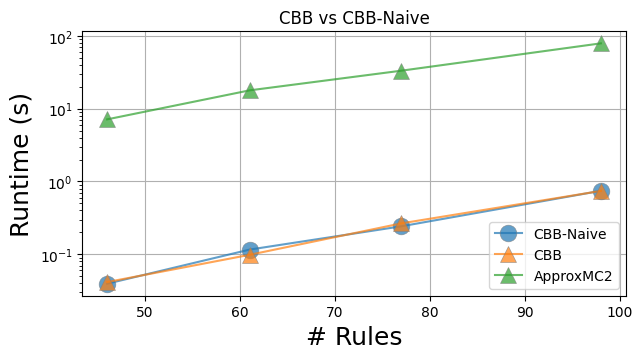

In [42]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

all_n_rules = [98, 77 , 61, 46]

plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times_approx_mc2, label="ApproxMC2", marker = "^", linewidth=1.5 , color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 

plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.yscale("log")
plt.savefig("plots/comparison_naive_and_v2_compas_approx_mc_075" + ".pdf" )
plt.show()

In [31]:
X.shape

(721, 15)

In [26]:
all_times_approx_mc2

[52.43833923339844, 23.83001685142517, 13.522405624389648, 4.638275146484375]

In [51]:
all_n_rules = [187, 130, 98, 77, 61, 41]

In [57]:
all_times_naive

[5.775805234909058,
 2.221764087677002,
 0.5227937698364258,
 0.2820167541503906,
 0.12995338439941406,
 0.048909664154052734]

In [58]:
from bds.meel import approx_mc2

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 
plt.plot(all_n_rules, all_times_approx_mc2rox_mc2rox_mc2rox_mc2, label="ApproxMC2", marker = "^", linewidth=1.5 , color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.7) 


plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.yscale("log")
plt.savefig("plots/comparison_naive_and_v2_compas_approx_mc" + ".pdf" )
plt.show()

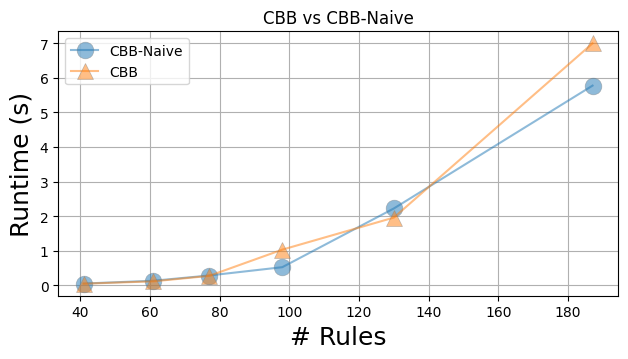

In [56]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


plt.plot(all_n_rules, all_times_naive, label="CBB-Naive", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(all_n_rules, all_times, label="CBB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("CBB vs CBB-Naive") 
plt.xlabel("# Rules", fontsize = 18)
plt.ylabel("Runtime (s)", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/comparison_naive_and_v2_compas" + ".pdf" )
plt.show()

In [55]:
all_times_naive

[5.775805234909058,
 2.221764087677002,
 0.5227937698364258,
 0.2820167541503906,
 0.12995338439941406,
 0.048909664154052734]

In [39]:
num_rules = len(rules) 

In [40]:
num_constraints = 5

In [41]:
rand_seed = 12

In [42]:
rand_seed = 12
num_constraints = 5
num_rules = len(rules) 
from bds.random_hash import generate_h_and_alpha
A, t = generate_h_and_alpha(
num_rules, num_constraints, rand_seed, as_numpy=True
)

In [43]:

actual_sols = solutions_to_dict(
list(cbb_v2.run(return_objective=True, A=A, t=t)))


[D 230620 16:20:40 cbb:160] setting up the parity constraint system
[D 230620 16:20:40 cbb:129] simplifying A x = t using rref
[D 230620 16:20:40 cbb:136] density(A_rref) = 49.639% (from 49.9%)


In [44]:
actual_sols

{(0, 49): 0.36629680998613035,
 (0, 7, 58): 0.3692094313453537,
 (0, 2, 7, 65): 0.38599167822468794,
 (0, 40, 52): 0.37614424410540914,
 (0, 2, 40, 68): 0.30000000000000004,
 (0, 40, 73): 0.25963938973647716,
 (0, 4, 40, 82): 0.3998613037447989,
 (0, 3, 12, 40): 0.3679611650485437,
 (0, 3, 20, 40): 0.38183079056865465,
 (0, 10, 40): 0.24438280166435508,
 (0, 4, 5, 40): 0.372122052704577,
 (0, 3, 28, 40): 0.3957004160887656,
 (0, 7, 8, 12): 0.38737864077669903,
 (0, 7, 8, 20): 0.3957004160887656,
 (0, 7, 13, 31): 0.3818307905686547,
 (0, 7, 18, 29): 0.3735090152565881,
 (0, 7, 24, 51): 0.34993065187239947,
 (0, 7, 29, 49): 0.3735090152565881,
 (0, 7, 29, 67): 0.3735090152565881,
 (0, 2, 24, 31, 40): 0.4,
 (0, 7, 31, 37): 0.39570041608876566,
 (0, 7, 31, 77): 0.3873786407766991,
 (0, 16, 31, 40): 0.30000000000000004,
 (0, 7, 36, 46): 0.3929264909847434,
 (0, 19, 36, 40): 0.30000000000000004,
 (0, 2, 8, 36, 40): 0.4,
 (0, 24, 40, 79): 0.30000000000000004,
 (0, 2, 13, 40, 51): 0.4,
 (0, 13

In [ ]:
all_times_naive = [] 
all_times_V0 = [] 
all_times_V1 = [] 
all_times_V2 = [] 
#
n_rep = 3 
#
lmbd = 0.1 
ub = 0.4
#
for _  in range(n_rep): 
    #
    start_time = time() 
    bbNaive = BranchAndBoundNaive(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbNaive.run(return_objective=True))
    all_times_naive.append(time() - start_time) 
    actualNaive = solutions_to_dict(feasible_solutions)
    #
    print("HLB done")
    #
    start_time = time() 
    bbV0 = BranchAndBoundV0(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV0.run(return_objective=True))
    all_times_V0.append(time() - start_time)
    actual_V0 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actualNaive)
    #
    print("RSSB done")
    #
    start_time = time() 
    bbV1 = BranchAndBoundV1(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV1.run(return_objective=True))
    all_times_V1.append(time() - start_time)
    actual_V1 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V0, actual_V1)
    #
    print("EPLB + RSSB done")
    #
    start_time = time() 
    bbV2 = BranchAndBoundV2(rules, ub=ub, y=y, lmbd=lmbd)
    feasible_solutions = list(bbV2.run(return_objective=True))
    all_times_V2.append(time() - start_time)
    actual_V2 = solutions_to_dict(feasible_solutions)
    #
    assert_dict_allclose(actual_V1, actual_V2)
    #
    print("HLB + RSSB done")

In [ ]:
actual_V1

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6.38, 3.7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']


x = [i for i in range(n_rep)]
plt.plot(x, all_times_naive, label="HLB", marker = "o", linewidth=1.5 , color = colors[0],  markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V0, label="RSSB", marker = "^", linewidth=1.5 , color = colors[1],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V1, label="RSSB + EPLB",  marker = "s", linewidth=1.5 ,  color = colors[2],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.plot(x, all_times_V2, label="RSSB + HLB",  marker = "P", linewidth=1.5 ,  color = colors[3],   markersize = 12 , markeredgewidth=0.5, markeredgecolor= "grey"  , alpha = 0.5) 
plt.title("RSSB VS HLB VS RSSB + EPLB VS RSSB + HLB") 
plt.xlabel("Run", fontsize = 18)
plt.ylabel("Runtime", fontsize = 18)
plt.legend()
plt.grid()
plt.tight_layout() 
plt.savefig("plots/first_comparison_bounds_compas" + ".pdf" )
plt.show()

When there are so few rule equivalent bounds seem to be useless. 

In [ ]:
for k in bbV1.equivalence_classes: 
    print(bbV1.equivalence_classes[k].data_points)
